# Box Plots
Andrew E. Davidson 
aedavids@ucsc.edu 
2/23/24  

Copyright (c) 2020-2023, Regents of the University of California All rights reserved. https://polyformproject.org/licenses/noncommercial/1.0.0

## <span style="color:red;background-color:yellow">TODO</span>
- check normalized gene expression averages why is axis start at -5000?
- calculateBoxPlotStats ~~repeats~~, ~~clades~~, ~~TE~~, ~~biotype (protien coding , lncRNA)~~
    * The TE and repeats box plots look identical. Is this a bug? try dynamite proportion plot of TE out all repeats for each type
- ~~organize labels so health is next to diease, ie Lung, LUAD, LUSC, ....~~
- ~~create plotGroups for repeats and TE's~~
- bar graph number of genes express across all sample for each type. df.shape[0] = number of expressed genes
- stacked bar chart
  * number of gene in clades , family, biotype, ...
  * proportion of gene in clades , family, biotype, ...
 
**output**
```
$ ls boxPlots.out/img/
bioType/
clade/
groupedNormalizedGencodeExpressionAverages/
groupedNormalizedGeneExpressionAverages/
groupedNormalizedRepeatsExpressionAverages/
groupedNormalizedTEExpressionAverages/
normalized-gencode-gene-expression-averages.png
normalized-gene-expression-averages.png
normalized-repeat-gene-expression-averages.png
normalized-TE-gene-expression-averages.png
```

**copy images to mac**
```
$ cd ~/googleUCSC/kimLab/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks
$ jupyterNotebooks=/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks
$ scp -r mustard:${jupyterNotebooks}/boxPlots.out/img/ boxPlots.out/
```

In [1]:
import ipynbname
from IPython.display import display
import matplotlib.pyplot as plt

import pandas as pd
# display all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# https://joelmccune.com/pandas-dataframe-to-markdown/
from pandas.io.clipboards import to_clipboard

import pathlib as pl
import pprint as pp
import numpy as np
import os
import sys

notebookName = ipynbname.name()
notebookPath = ipynbname.path()
notebookDir = os.path.dirname(notebookPath)

outDir = f'{notebookDir}/{notebookName}.out'
os.makedirs(outDir, exist_ok=True)
print(f'outDir:\n{outDir}')

imgOut = f'{outDir}/img'
os.makedirs(imgOut, exist_ok=True)
print(f'\nimgOut :\n{imgOut}')

outDir:
/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out

imgOut :
/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img


/data/tmp/ipykernel_3589773/3008285523.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# setting the python path allows us to run python scripts from using
# the CLI. 
ORIG_PYTHONPATH = os.environ['PYTHONPATH']

deconvolutionModules = notebookPath.parent.joinpath("../../../deconvolutionAnalysis/python/")
print("deconvolutionModules: {}\n".format(deconvolutionModules))

PYTHONPATH = ORIG_PYTHONPATH + f':{deconvolutionModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))

#intraExtraRNA_POCModules=notebookPath.parent.joinpath("../../../python/src")
intraExtraRNA_POCModules=notebookPath.parent.joinpath("../../../intraExtraRNA_POC/python/src")
print("intraExtraRNA_POCModules: {}\n".format(intraExtraRNA_POCModules))

PYTHONPATH = PYTHONPATH + f':{intraExtraRNA_POCModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))

os.environ["PYTHONPATH"] = PYTHONPATH
PYTHONPATH = os.environ["PYTHONPATH"]
print("PYTHONPATH: {}\n".format(PYTHONPATH))

# to be able to import our local python files we need to set the sys.path
# https://stackoverflow.com/a/50155834
sys.path.append( str(deconvolutionModules) )
sys.path.append( str(intraExtraRNA_POCModules) )
print("\nsys.path:\n{}\n".format(sys.path))

deconvolutionModules: /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/../../../deconvolutionAnalysis/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/../../../deconvolutionAnalysis/python

intraExtraRNA_POCModules: /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/../../../intraExtraRNA_POC/python/src

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/../../../deconvolutionAnalysis/python:/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/../../../intraExtraRNA_POC/python/src

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/../../../deconvolutionAnalysis/python:/private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyte

In [3]:
# import from local repo
from bme263DataVis.utilities import MatPlotLibUtilities
from pipeline.dataFactory.utilities import urlify
from intraExtraRNA.mapIds import mapHUGO_2_ENSG

In [4]:
%%time
dataRoot = "/private/groups/kimlab/GTEx_TCGA/groupbyGeneTrainingSets"
dataRoot = "/scratch/aedavids/tmp"

normalizedGroupbyHDF5Path = f'{dataRoot}/GTEx_TCGA_NormalizedGroupby.hdf5'
print(normalizedGroupbyHDF5Path)
normalizedGroupbyHDF5_DF = pd.read_hdf(normalizedGroupbyHDF5Path)
print( f'normalizedGroupbyHDF5_DF.shape : {normalizedGroupbyHDF5_DF.shape}' )
display(normalizedGroupbyHDF5_DF.iloc[0:3, 0:3])
print()

/scratch/aedavids/tmp/GTEx_TCGA_NormalizedGroupby.hdf5
normalizedGroupbyHDF5_DF.shape : (74777, 22183)


,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0726-SM-5GIEN
geneId,,,
(A)n,7.506043,0.68924,1.611646
(AAA)n,0.000000,0.00000,0.000000
(AAAAAAC)n,0.000000,0.00000,0.000000



CPU times: user 9.38 s, sys: 11 s, total: 20.3 s
Wall time: 20.4 s


In [5]:
colDataPath = f"{dataRoot}/GTEx_TCGA_ColData.hdf5"
print(colDataPath)
colDataDF = pd.read_hdf(colDataPath)
print(f'colDataDF.shape : {colDataDF.shape}' )
display(colDataDF.head())

/scratch/aedavids/tmp/GTEx_TCGA_ColData.hdf5
colDataDF.shape : (22183, 5)


,participant_id,category,gender,age,dataSet
sample_id,,,,,
GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F,Adipose_Subcutaneous,Female,66.0,GTEx
GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F,Artery_Tibial,Female,66.0,GTEx
GTEX-1117F-0726-SM-5GIEN,GTEX-1117F,Heart_Atrial_Appendage,Female,66.0,GTEx
GTEX-1117F-2826-SM-5GZXL,GTEX-1117F,Breast_Mammary_Tissue,Female,66.0,GTEx
GTEX-1117F-3226-SM-5N9CT,GTEX-1117F,Brain_Cortex,Female,66.0,GTEx


In [6]:
tissue2CancerPath = f"{dataRoot}/tissue2Cancer.csv"
tissue2CancerDF = pd.read_csv(tissue2CancerPath, index_col="category" )
print(f'tissue2CancerDF.shape : {tissue2CancerDF.shape}')
display( tissue2CancerDF.head())

print(f'tissue2CancerDF.columns : {tissue2CancerDF.columns}')
plotGroups = np.sort( tissue2CancerDF.loc[:, "plotGroup"].unique() )
print(f'len(plotGroups) {len(plotGroups)}' )
plotGroups

tissue2CancerDF.shape : (84, 3)


,dataSet,plotGroup,description
category,,,
Adipose_Subcutaneous,GTEx,Adipose,NaN
Adipose_Visceral_Omentum,GTEx,Adipose,NaN
Adrenal_Gland,GTEx,Adrenal,NaN
ACC,TCGA,Adrenal,Adrenocortical carcinoma
Artery_Aorta,GTEx,Heart,NaN


tissue2CancerDF.columns : Index(['dataSet', 'plotGroup', 'description'], dtype='object')
len(plotGroups) 23


array(['Adipose', 'Adrenal', 'Bladder', 'Blood', 'Brain', 'Breast',
       'Cervix', 'Colon', 'Esophagus', 'Heart', 'Kidney', 'Liver', 'Lung',
       'Ovary', 'Pancreas', 'Prostate', 'Skin', 'Stomach', 'Testis',
       'Thyroid', 'Uterus', 'Uveal Melanoma', 'unknown'], dtype=object)

## test box plots

In [7]:
testLabels = normalizedGroupbyHDF5_DF.columns[0:3]
print(testLabels)
testValues = normalizedGroupbyHDF5_DF.iloc[0:10, 0:3]
noise = np.random.rand(10,3)
# create a flier
noise[9,0] = 10.0
testValues = testValues + noise
print(testValues.shape)
display(testValues)

Index(['GTEX-1117F-0226-SM-5GZZ7', 'GTEX-1117F-0526-SM-5EGHJ',
       'GTEX-1117F-0726-SM-5GIEN'],
      dtype='object')
(10, 3)


,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0726-SM-5GIEN
geneId,,,
(A)n,7.821361,1.213102,2.129792
(AAA)n,0.656565,0.649553,0.040555
(AAAAAAC)n,0.762819,0.991018,0.677741
(AAAAAAG)n,0.332701,0.138043,0.200265
(AAAAAAT)n,0.712093,0.595008,0.200999
(AAAAAC)n,0.153428,0.747119,0.539226
(AAAAACA)n,0.848867,0.943367,0.102703
(AAAAACC)n,0.100120,0.922650,0.926877
(AAAAACT)n,0.837333,0.548313,0.171176


In [8]:
def calculateBoxPlotStats(df : pd.DataFrame, byIdx=True) -> pd.DataFrame:
    '''
    calculate stats used to create wisker plots. We want to identify flier gene expresions

    byIdx:
        if true stats are calculated on the columns else rows

    returns dataframe
        0.25, 0.5, 0.75 quartiles. Note the column/row idx is a float not a string
        means, medians, 
        upper and lower wisker range. The wiskers do not work the way you think

        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html 
        The whiskers extend from the box to the farthest data point lying within 1.5x
        the inter-quartile range (IQR) from the box. Flier points are those past the
        end of the whiskers.   
        
    '''
    axis = 0
    if not byIdx:
        axis = 1
        
    byCols = 1
    retDF = df.quantile( [0.25, 0.5, 0.75], axis=axis )
    #print(f'retDF.shape {retDF.shape}' )
    retDF = retDF.transpose()
    #print(f'retDF.shape {retDF.shape}' )

    means = df.mean(axis=axis )
    medians = df.median(axis=axis )

    #
    # calculate whiskers
    #
    q3 =  retDF[0.75]
    q2 = retDF[0.5]
    q1 = retDF[0.25]
    
    # IQR : inter quartile range    
    iqr = q3 - q1

    upperWisker = q3 + (iqr * 1.5) 
    lowerWisker = q1 - (iqr * 1.5)
    

    retDF['means'] = means
    retDF['medians'] = medians
    retDF['upperWisker'] = upperWisker
    retDF['lowerWisker'] = lowerWisker
    
    return retDF

testQuantiles = calculateBoxPlotStats( testValues, byIdx=True )

print(f'testQuantile.shape {testQuantiles.shape}' )
display( testQuantiles )

testQuantile.shape (3, 7)


,0.25,0.5,0.75,means,medians,upperWisker,lowerWisker
GTEX-1117F-0226-SM-5GZZ7,0.413667,0.737456,0.845983,2.222529,0.737456,1.494457,-0.234807
GTEX-1117F-0526-SM-5EGHJ,0.559987,0.698336,0.938188,0.717573,0.698336,1.505489,-0.007315
GTEX-1117F-0726-SM-5GIEN,0.178449,0.370112,0.859432,0.590933,0.370112,1.880907,-0.843027


In [9]:
def whatDoesBoxPlotReturn():
    '''
    figure out what types boxplot returns
    
    keys : whiskers, caps, boxes, medians, fliers, means
    value type : list[matplotlib.lines.Line2D]
    ''' 
    for k in testBoxPlotDict.keys():
        print()
        l = len(testBoxPlotDict[k])
        print( f'k: {k}, { type(testBoxPlotDict[k]) } len : { l }')
        if l > 0 :
            print(f' type(testBoxPlotDict[k][0]) : { type(testBoxPlotDict[k][0]) }' )

# whatDoesBoxPlotReturn()

In [10]:
def selectGenesThatAreExpressedAcrossAllSamples(countDF : pd.DataFrame) -> pd.DataFrame:
    '''
    todo
    '''
    # logical data frame. is gene expressed in sample
    greaterThanDF = countDF > 0

    # find genes that are expressed in all samples
    numSamples = countDF.shape[1]

    byRow = 1
    selectIdx = greaterThanDF.sum(axis=byRow) >= numSamples

    retDF = countDF.loc[selectIdx, :]

    return retDF

def testSelectGenesThatAreExpressedAcrossAllSamples():
    testDF = pd.DataFrame(
        {
            "s1" : [7, 1, 2],
            "s2" : [5, 0, 7],
            "s3" : [1, 0, 2],
            "s4" : [10, 3, 5],            
            "s5" : [10, 3, 5],            
        }
    )

    expectedDF = pd.DataFrame(
        {
            "s1" : [7,  2],
            "s2" : [5,  7],
            "s3" : [1,  2],
            "s4" : [10, 5],            
            "s5" : [10, 5],            
        },
        index=[0,2],
    )

    resultDF = selectGenesThatAreExpressedAcrossAllSamples(testDF)
    
    pd.testing.assert_frame_equal(expectedDF, resultDF)

testSelectGenesThatAreExpressedAcrossAllSamples()

In [11]:
def getCategorySampleIds(metaDataDF : pd.DataFrame,
                        ) -> dict['str', list[pd.Series] ] :
    '''
    returns a dictionary
        keys are the colDataDF categories
        values are a list of sample ids

    '''
    retDict = dict()
    categories = metaDataDF.loc[:, "category"].unique()
    for category in categories:
        selectRows = metaDataDF.loc[:, "category"] == category
        #sampleIds = metaDataDF.loc[selectRows, 'sample_id']
        sampleIds = metaDataDF.loc[selectRows, :].index
        #print(f'{category} :  len(sampleIds : {len(sampleIds)} {sampleIds[0:3]}' )
        retDict[ category ] = sampleIds

    return retDict

categoryDict = getCategorySampleIds( colDataDF )

In [12]:
%%time
def geneStats(
    valuesDF : pd.DataFrame,
    byIdx : bool = 1 
    ) -> pd.DataFrame:
    '''
    todo

    adds mean, median, and std to valuesDF. This future proofs implementation. 
    else you get a warning about pandas v.3 changing copy on write default
    
    byIdx:
        default 1: calculate stats for each row
    '''
    means =  valuesDF.mean(axis=byIdx)
    medians = valuesDF.median(axis=byIdx)
    std = valuesDF.std(axis=byIdx)
    
    valuesDF['geneMeans'] = means
    valuesDF['geneMedians'] = medians
    valuesDF['geneStds'] = std

    return valuesDF
    

CPU times: user 7 µs, sys: 6 µs, total: 13 µs
Wall time: 22.4 µs


Index(['GTEX-1117F-0226-SM-5GZZ7', 'GTEX-1117F-0526-SM-5EGHJ',
       'GTEX-1117F-0726-SM-5GIEN'],
      dtype='object')


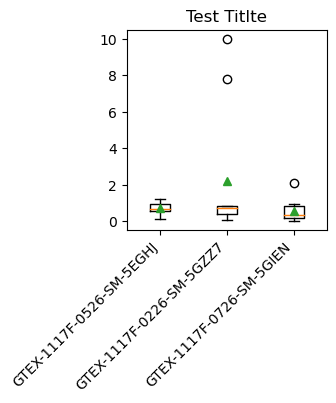

In [13]:
def klBoxPlot(values :list[float], 
            labels: list[str], 
            title : str,
              panel : plt.axes, 
            # w : int = 4,
            # h :  int = 4,
            showmeans=True,
             vert=True,
              showfliers=True, 
              #meanline=False
             #) -> tuple[plt.figure, list[plt.axes], dict]:
             ) -> dict :
    '''
    TODO
    https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html

    # returns a tuple with elements:
    #     figure, 
    #     list of panels,
    #     dictionary returned by matplotlib.axes.Axes.boxplot. All the values are lists of matplotlib.lines.Line2D


    returns:
        dictionary returned by matplotlib.axes.Axes.boxplot. All the values are lists of matplotlib.lines.Line2D
        
    '''
    # w = 12
    # h = 3
    #fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(w, h), ) #sharey=True
    panel.set_title( title )
    #fig.suptitle( "sub title" )
    # vert=False # display box blot with label along the y axis
    # vert=True 
    boxPlotResultsDict = panel.boxplot(values, labels=labels, 
                             showmeans=showmeans, 
                             #meanline=meanline,
                             vert=vert,
                            showfliers=showfliers,
                            )

    panel.set_xticks(panel.get_xticks(), panel.get_xticklabels(), rotation=45, ha='right')


    #return (fig, axs, boxPlotResultsDict)
    return boxPlotResultsDict

####################################################################################################
# testFig, testPanels, testBoxPlotDict = klBoxPlot(testValues, testLabels, testTitle, showfliers=True)
# reoderTestValues = testValues.loc[:, recorderLabels]

#
# create a figure with a single panel equal to figure size
#
pageWidthInInches = 2
pageHeightInInches = 2
testBoxPlotFit =  plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )
mplu = MatPlotLibUtilities()
boxPlotPanel = mplu.createPanelSameSizeAsFig(testBoxPlotFit)

testTitle = "Test Titlte"
print(testLabels)
recorderLabels = [ 'GTEX-1117F-0526-SM-5EGHJ', 'GTEX-1117F-0226-SM-5GZZ7', 'GTEX-1117F-0726-SM-5GIEN']
reoderTestValues = testValues.loc[:, recorderLabels]
# testFig, testPanels, testBoxPlotDict = klBoxPlot(reoderTestValues, recorderLabels, testTitle, showfliers=True)
testBoxPlotDict = klBoxPlot(reoderTestValues, recorderLabels, testTitle, boxPlotPanel, showfliers=True)

In [14]:
%%time
def selectSamples(
    categoryDict : dict['str', list[pd.Series]], 
    countDF : pd.DataFrame, ) -> dict[str, pd.DataFrame] :
    debug : bool = False
    '''
    select samples for each category. sample ids are the columns in the countDF.
    Fast way to reduce the size of dataframe we want to explore. 

    returns a dictionary
        key = key from categoryDict dictionary
        values = sampleCounts for genes that are expressed in all samples
                additional columns:
                    means, medians, std
    '''
    retDict = dict()
    byRow = 1
    for key in categoryDict.keys(): # ['Lung', 'LUAD', 'LUSC']:
        sampleIdSeries = categoryDict[key]
        if debug:
            print(f"AEDWIP before key:{key} ")
        # depending on filtering  some samples may not be present?
        #samples = set(sampleIdSeries).intersection( set(countDF.columns) )
        valuesDF = countDF.loc[:, sampleIdSeries]
        if debug:
            print(f"AEDWIP after")

        #
        # remove genes that are not express across all samples
        #
        valuesDF = selectGenesThatAreExpressedAcrossAllSamples(valuesDF)
        geneStats( valuesDF, byIdx=byRow)
                
        retDict[key] = valuesDF

    return retDict
        

CPU times: user 8 µs, sys: 7 µs, total: 15 µs
Wall time: 26.2 µs


In [15]:
%%time
# categoryCountsDict = selectSamples(categoryDict, normalizedGroupbyHDF5_DF)
normalizedAllGenesExpressedCountsDict = selectSamples(categoryDict, normalizedGroupbyHDF5_DF)

CPU times: user 21.7 s, sys: 6.01 s, total: 27.7 s
Wall time: 21 s


In [16]:
normalizedAllGenesExpressedCountsDict['LUAD'].shape
#display( categoryCountsDict['LUAD'] )

(16086, 518)

## normalized gene expression averages box plot

In [17]:
def categoryBoxPlots(
    countDict : dict, # [str, pd.DataFrame]
    title : str,
    # w : int = 4, 
    # h : int = 4,
    boxPlotPanel : plt.axes,
    plotOrder : list[str] = None,
    verbose : bool = False,    
    # ) -> tuple[plt.figure, list[plt.axes], dict] :
    ) -> dict :
    '''
    TODO
    '''
    # plt.close('all')
    # print("AEDWIP notice averages are way above median. suggest lots of outlier, evidence for differentially express up regulation\n" )
    # title = "normalized gene expression averages"
    # title = "normalized gene expression mode"

    lables = countDict.keys()
    lables = list(lables)
    if plotOrder is not None:
        lables = plotOrder
        #print(f'AEDWIP plotOrder {lables}')

    values = []
    lables = lables.copy() # if key is missing modify local copy
    for key in lables:
        if key not in countDict :
            print(f'!!!!! warning {key} is not in countDict')
            lables.remove(key)
            continue
            
        #meansSeries = categoryCountsDict[key].loc[:, 'geneMeans'].sample(frac=0.1)            
        meansSeries = countDict[key].loc[:, 'geneMeans'].sample(frac=1.0)
        
        if verbose:
            # : <25 left align text
            debugNumG = f'numGenes: {countDict[key].shape[0]}'
            debugMean = f'geneMeans.mean : {np.round(countDict[key].loc[:, "geneMeans"].mean())}'
            debugStd = f'geneMeans.std : {np.round(countDict[key].loc[:, "geneMeans"].std())}'
            debugMedian= f'geneMeans.median() : { np.round(countDict[key].loc[:, "geneMeans"].median()) }'
            quantile = f'quantile(0.25) : { np.round(countDict[key].loc[:, "geneMeans"].quantile(q=0.25)) }'
            print(f'{key : <25}  {debugNumG} {debugMean}  {debugStd} {debugMedian} {quantile}')
            
        values.append(meansSeries)

    # create all the box plots

    # boxPlotFig =  plt.figure( figsize=( w, h ) )
    # mplu = MatPlotLibUtilities()
    # boxPlotPanel = mplu.createPanelSameSizeAsFig(boxPlotFig)
    
    # fig, panels, boxPlotDict = klBoxPlot(values, lables, title,  
    boxPlotDict = klBoxPlot(values, lables, title,  
                        boxPlotPanel,
                        vert=False, 
                        showfliers=False,
                       )
    return boxPlotDict

******

only genes that are expressed in all samples for a given type where used
filers not shown. plot does not display because of extreme scale

notice the mean and median are not close. This suggest that there are several highly expressed genes

!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/normalized-gene-expression-averages.png
CPU times: user 5.75 s, sys: 640 ms, total: 6.39 s
Wall time: 5.89 s


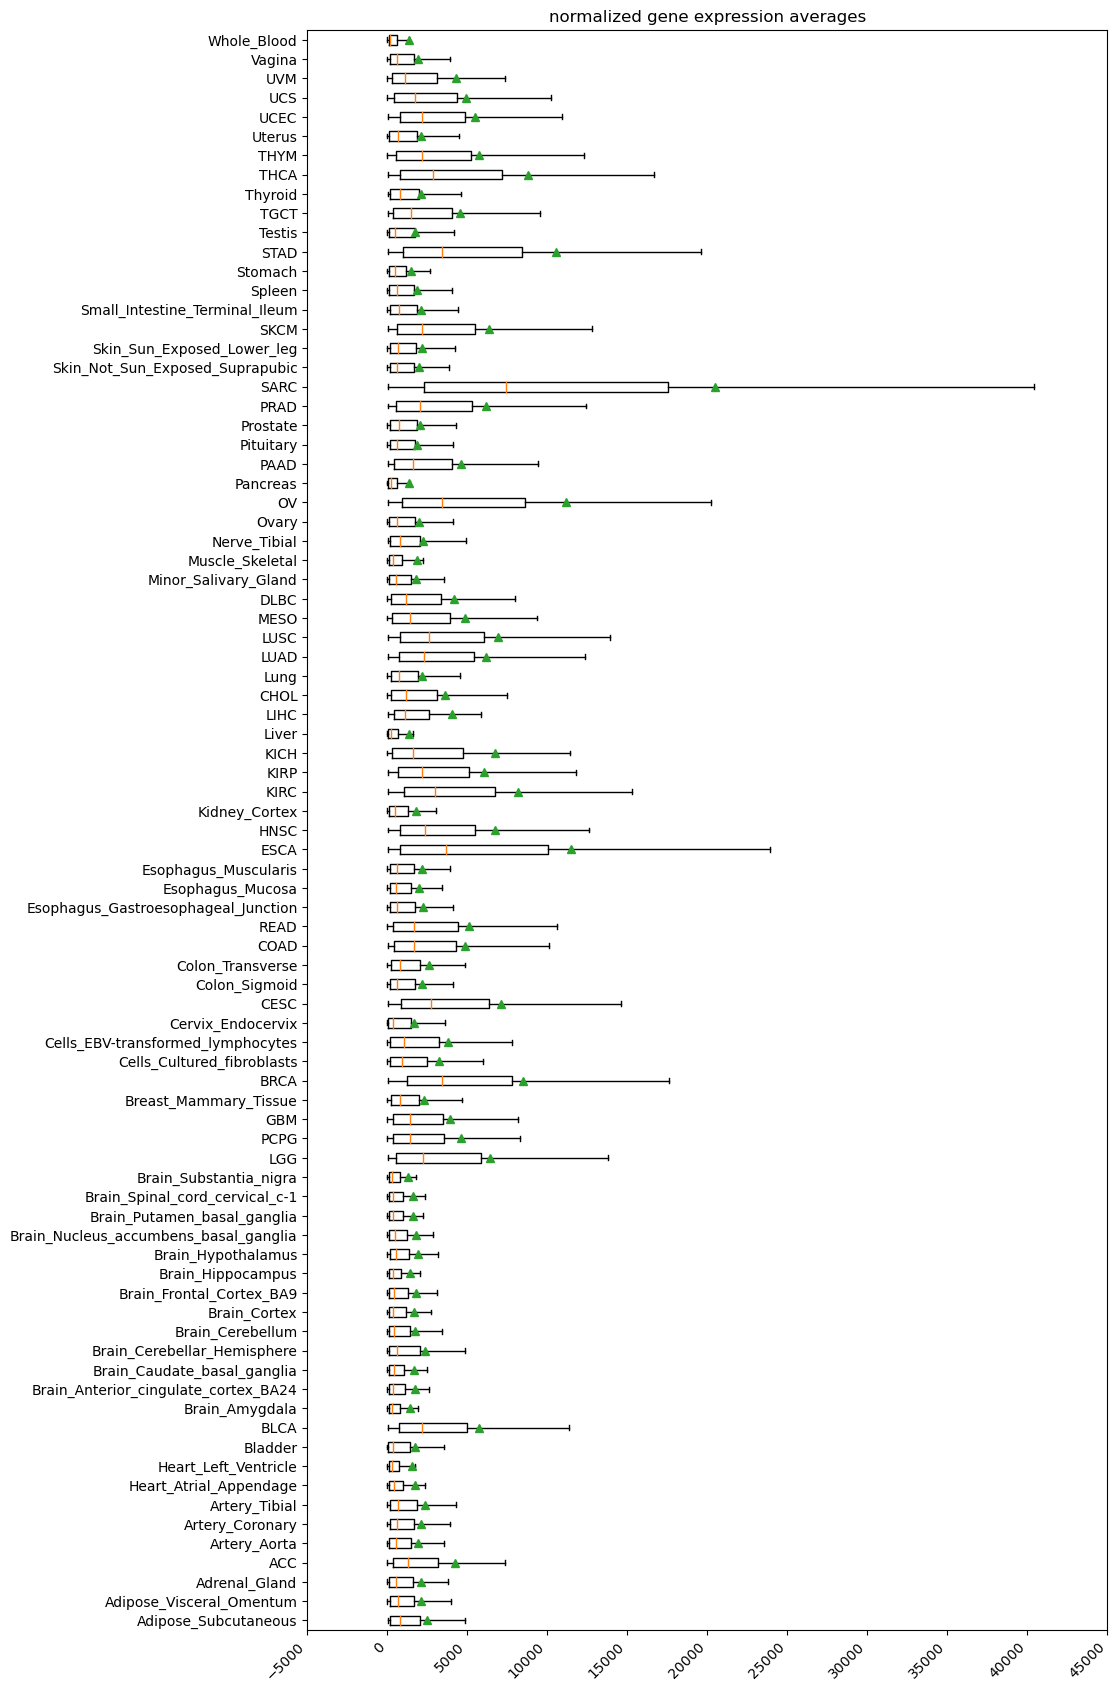

In [18]:
%%time
def plotNormalizedAllGenesExpressedCountsDict() :
    '''
    function wrapper to prevent global polution?
    '''
    # print(f'********\nnotice number express genes is about the same, median is near zero, average is outside wisker. suggest lots of outliers. potential differential expressed genes\n')
    print(f'******\n')
    print(f'only genes that are expressed in all samples for a given type where used')
    print(f'filers not shown. plot does not display because of extreme scale\n')
    print(f'notice the mean and median are not close. This suggest that there are several highly expressed genes\n')

    boxPlotFig =  plt.figure( figsize=(8, 16) )
    mplu = MatPlotLibUtilities()
    boxPlotPanel = mplu.createPanelSameSizeAsFig(boxPlotFig)

    title="normalized gene expression averages"
    boxPlotDict = categoryBoxPlots(normalizedAllGenesExpressedCountsDict, 
                                  title , 
                                  boxPlotPanel,
                                  # w = 8,
                                  # h = 16,
                                  verbose=False,
                                  plotOrder = list(tissue2CancerDF.index),
                                 )

    imgFilePath = f'{imgOut}/{urlify(title)}.png'
    boxPlotFig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
    print(f'saved image to {imgFilePath}')

################################################################################
plotNormalizedAllGenesExpressedCountsDict()

In [19]:
  def createSupportTableData(
                            categories : list[str],
                            plotGroupCountDict : dict[str, pd.Series],
                          ) -> pd.DataFrame :
    '''
        returns a table with column ['category', 'n samples', 'n genes']
        the categories = the categories argumnet
        The 'n samples' is the support for each category
        the 'n genes' column is number of genes ploted for category

    arguments:
        categories : 
            list of types in categoryDict to create support table for

        plotGroupCountDict
            keys: the colDataDF categories
            values: a list of sample ids from 


    '''
    tableNumSamplesDataList = []
    tableNumGenesDataList = []

    # save table elements data
    for category in categories:
        #print(f'category : {category}')
        if not category in categoryDict:
            print(f'!!! warning {category} is not in categoryDict')
            continue    
            
        #tableTypesDataList.append(category)
        
        sampleIds = categoryDict[category]
        numSamples = len(sampleIds )
        tableNumSamplesDataList.append( numSamples )

   # calculate number of genes
    for key in categories:
        if not key in plotGroupCountDict:
            print(f'!!! warning {key} is not in plotGroupCountDict')
            continue

        tDF = plotGroupCountDict[key]
        numGenes = len(tDF.index)
        #print(f'key {key} numGenes : {numGenes}')
        tableNumGenesDataList.append( numGenes )

    # print(f'categories : {categories}')
    # print(f'tableNumSamplesDataList : {tableNumSamplesDataList}')
    # print(f'tableNumGenesDataList : {tableNumGenesDataList}')
    retTableDF = pd.DataFrame( {
                            'category' : categories, #tableTypesDataList,
                            'n samples' : tableNumSamplesDataList,
                            'n genes' : tableNumGenesDataList,
                            }, 
                            )

    return retTableDF

In [20]:
def getBBoxHightScalingFactor(numCategories : int):
    '''
    trial and error
    brain is about the largest group. setting scale = 1.0 looks good
    groups with 2 categories work well with 0.5
    '''
    if numCategories < 2 :
        numCategories = 2

    if numCategories >= 17 :
        numCategories = 16

    start = 0.5
    stop = 1.0
    numSteps = 17 - 2
    s = np.linspace(start, stop, numSteps)

    return s[numCategories - 2]
    


 plotGroup : Adipose
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGeneExpressionAverages/Adipose-normalized-gene-expression-averages.png

 plotGroup : Adrenal
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGeneExpressionAverages/Adrenal-normalized-gene-expression-averages.png

 plotGroup : Bladder
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGeneExpressionAverages/Bladder-normalized-gene-expression-averages.png

 plotGroup : Blood
!!! warning LAML is not in categoryDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGeneExpressionAverages/Blood-normalized-gene-expression-averages.png

 plotGroup : Brain
saved image to /private/home/aedavids/extraCellularRNA/t

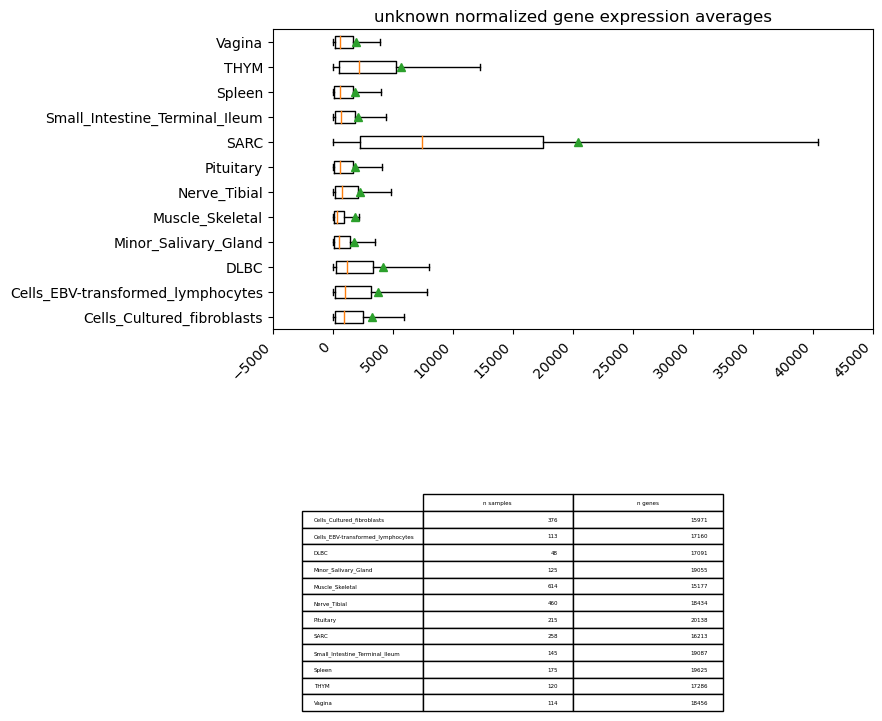

In [21]:
def createGroupGenesExpressedCountsPanels(
        figWidthInInches : int,
        numCategories : int,
        ) -> (plt.figure, plt.axes, plt.axes):
    '''
    matplotlib will not render correctly unless you create all the panels first
    '''

    boxPlotHeight = numCategories // 6 + 1
    tableHeight = boxPlotHeight / 10
    figHeight = boxPlotHeight + tableHeight
    
    fig =  plt.figure( figsize=( figWidthInInches, figHeight ) )
    
    boxPanelLeftRelativeSize = 0.0 # left margin
    boxPanelBottomRelativeSize = 0.5 # upper 1/2

    boxPlotPanel =  mplu.createPanel( fig,
                                     figWidthInInches, boxPlotHeight,
                                     boxPanelLeftRelativeSize, boxPanelBottomRelativeSize
                                    )

    tableLeftRelativeSize = 0.25 # % from left margin
    tableBottomRelativeSize = 0.0 # on the bottom

    tablePanel = mplu.createPanel( fig,
                                    figWidthInInches / 2, tableHeight ,
                                    tableLeftRelativeSize, tableBottomRelativeSize )

    tablePanel.xaxis.set_ticks([])
    tablePanel.yaxis.set_ticks([])
    tablePanel.set_xlabel('')
    tablePanel.set_ylabel('')

    tablePanel.spines['top'].set_visible(False)  # Hide the top border
    tablePanel.spines['right'].set_visible(False) # Hide the right border    
    tablePanel.spines['bottom'].set_visible(False)  
    tablePanel.spines['left'].set_visible(False)

    return (fig, boxPlotPanel, tablePanel)
    
def plotGroupGenesExpressedCounts(  
        categoryDict,
        countsDF,
        groupsDF : pd.DataFrame,
        groupsToPlot : list[str],
        titleSuffix : str,
        outDir : str
    ) :
    '''
    todo
    
    arguments:
        categoryDict:
            keys: the colDataDF categories
            values: a list of sample ids from 

        countsDF: 
            index: gene ids. example Index(['(AATGG)n', '(AC)n', '(ACACAT)n']
            cols : sample ids
            values:  counts

        groupsDF:
            index = category. These are keys into categoryDict
            column 'plotGroup'

        groupsToPlot:
            a list of groupDF index to plot

        titleSuffix:
            plot tile.
            final title will be '{plotGroup} {titleSuffix}'

        outDir : str
    '''
    mplu = MatPlotLibUtilities()

    i = 0
    for plotGroup in groupsToPlot:      
        print(f'\n plotGroup : {plotGroup}')
        plt.close('all') # RuntimeWarning: More than 20 figures have been opened.

        # create a categoryDict for the plotGroup
        plotGroupCategoryDict = dict()
        selectRows = groupsDF.loc[:, "plotGroup"] == plotGroup
        categories = list( groupsDF.loc[selectRows, : ].index )
        for category in categories:
            #print(f'category : {category}')
            if not category in categoryDict:
                print(f'!!! warning {category} is not in categoryDict')
                # data frame columns must be the same length
                categories.remove( category )
                continue

            plotGroupCategoryDict[ category] = categoryDict[category]
        
        plotGroupCountDict = selectSamples( plotGroupCategoryDict, countsDF )


        #
        # plot box plot
        #
        width = 6   
        numCategories = len(categories)        
        fig, boxPlotPanel, tablePanel = createGroupGenesExpressedCountsPanels(width, numCategories)
        title=f"{plotGroup} {titleSuffix}"          
        boxPlotDict = categoryBoxPlots( plotGroupCountDict, 
                                        title,
                                        boxPlotPanel,
                                        #plotOrder = list(tissue2CancerDF.index),
                                      )

        #
        # create support table
        #
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html
        tableDF = createSupportTableData(categories, plotGroupCountDict)
        #print(f'AEDWIP tableDF\n{tableDF}')
        columns = ['n samples', 'n genes']
        table = tablePanel.table(
            cellText=tableDF.loc[:, columns].values, 
            colLabels=columns,
            rowLabels=tableDF.loc[:, 'category'],
            loc='bottom',
            # fontsize=5, does not work
        )
        
        # Set font size for each cell
        tableFontSize = 4
        for key, cell in table.get_celld().items():
            cell.set_fontsize(tableFontSize)

        #
        # save
        #
        imgFilePath = f'{outDir}/{urlify(title)}.png'
        fig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
        print(f'saved image to {imgFilePath}')

        # if i > 4:
        #     print("AEDWIP !!!!!!!!!!!! early exit")
        #     break
        # i += 1        

################################################################################
#%%time
#plt.close('all') # release memory
titleSuffix = "normalized gene expression averages"
plotGroupNormalizedAllGenesExpressedCountsOutDir = f'{imgOut}/groupedNormalizedGeneExpressionAverages'
os.makedirs(plotGroupNormalizedAllGenesExpressedCountsOutDir, exist_ok=True)
# plotGroupNormalizedAllGenesExpressedCounts(    
plotGroupGenesExpressedCounts(    
        categoryDict,
        normalizedGroupbyHDF5_DF,
        tissue2CancerDF,
        plotGroups,
        titleSuffix,
        plotGroupNormalizedAllGenesExpressedCountsOutDir, 
    )

#plt.close('all') # release memory

## normalized repeat gene expression averages box plot

In [22]:
%%time
repeatInfoFilePath = f'{dataRoot}/named_ucsc.rmsk.insert.info.txt'
print(repeatInfoFilePath)
repeatDF = pd.read_csv(repeatInfoFilePath, sep="\t", index_col='insert')
print(f'repeatDF.shape : {repeatDF.shape}')
repeatDF.iloc[0:5, :]

/scratch/aedavids/tmp/named_ucsc.rmsk.insert.info.txt
repeatDF.shape : (15625, 2)
CPU times: user 29.5 ms, sys: 20.6 ms, total: 50 ms
Wall time: 16 ms


,clade,family
insert,,
(TAACCC)n,Simple_repeat,Simple_repeat
TAR1,Satellite,telo
L1MC5a,LINE,L1
MER5B,DNA,hAT-Charlie
MIR3,SINE,MIR


In [23]:
%%time
def selectGenesWithProperty( 
    categoryDict : dict['str', list[pd.Series]],
    categoryCountsDict : dict['str', pd.DataFrame],
    propertyIdx : pd.core.indexes.base.Index
   ) -> pd.DataFrame :
    '''
    for each category in categoryCountsDict
        select the category samples from categoryDict
        select the rows that match propertyIdx
        add stats for each gene. See geneStats()

    arguments:
        categoryDict:
            keys: the colDataDF categories
            values: a list of sample ids from 

        categoryCountsDict:
            index: gene ids. example Index(['(AATGG)n', '(AC)n', '(ACACAT)n']
            keys: the colDataDF categories
            values: data frame of counts

        propertyIdx:
            a set of gene ids that are repeats
    '''
    retDict = dict()
    for category in categoryCountsDict.keys():
        byRow = 1
        sampleIdSeries = categoryDict[category]
        categoryCountsDF = categoryCountsDict[category]
        countsDF = categoryCountsDF.loc[:, sampleIdSeries]

        selectRepeatRows = countsDF.index.isin(propertyIdx)
        df = countsDF.loc[selectRepeatRows, :]

        # used copy() to future proof.
        # we get a pandas warning copy on write for slice default will change in v 3. 
        df = geneStats(df.copy(), byIdx=byRow)   
        retDict[category] = df

    return retDict
                 
xxx = selectGenesWithProperty( categoryDict, 
                               normalizedAllGenesExpressedCountsDict, 
                               repeatDF.index)        

################################################################################
normalizedRepeatsAllGenesExpressedCountsDict = xxx

CPU times: user 1.58 s, sys: 728 ms, total: 2.3 s
Wall time: 2.3 s


******

only genes that are expressed in all samples for a given type where used
filers not shown. plot would not display because of extreme scale

!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/normalized-repeat-gene-expression-averages.png


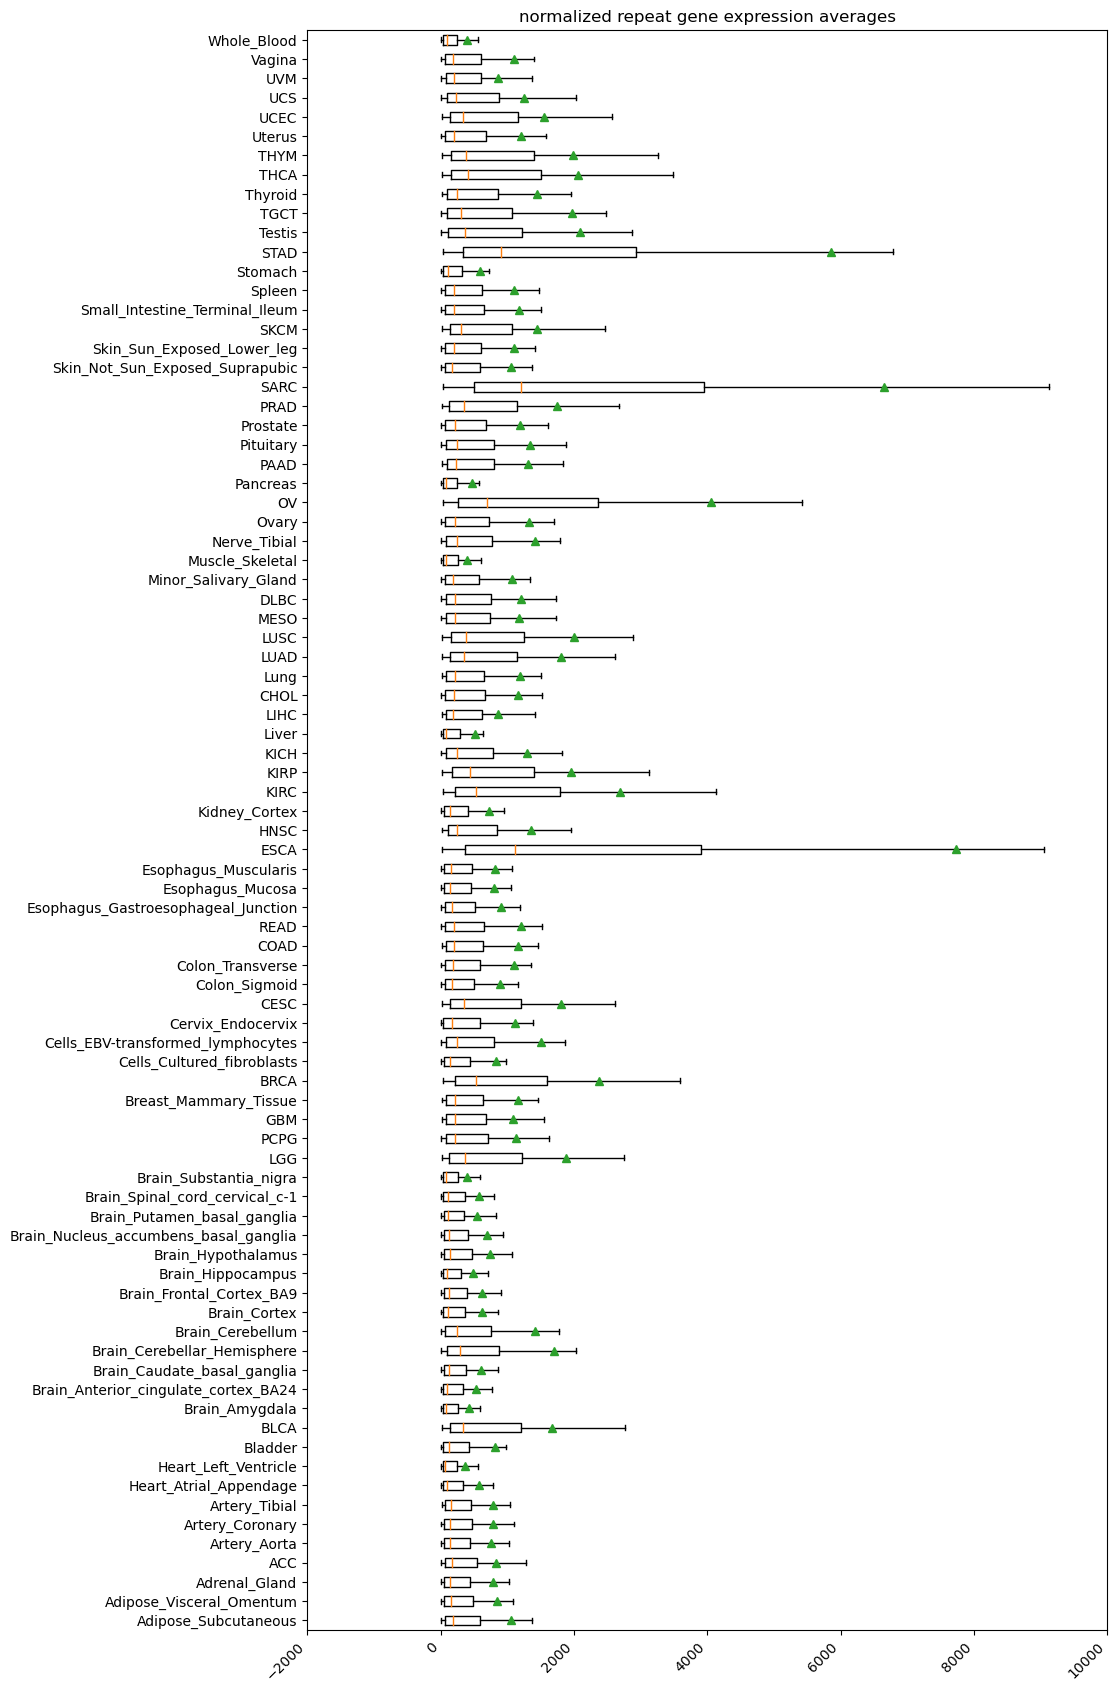

In [24]:
def plotNormalizedRepeatsAllGenesExpressedCountsDict() :
    '''
    function wrapper to prevent global polutions
    '''
    print(f'******\n')
    print(f'only genes that are expressed in all samples for a given type where used')
    print(f'filers not shown. plot would not display because of extreme scale\n')

    pageWidthInInches = 8
    pageHeightInInches = 16
    fig =  plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
    mplu = MatPlotLibUtilities()
    boxPlotPanel = mplu.createPanelSameSizeAsFig(fig)

    title="normalized repeat gene expression averages" 
    plotOrder = list(tissue2CancerDF.index)
    boxPlotDict = categoryBoxPlots(
                                  normalizedRepeatsAllGenesExpressedCountsDict, 
                                  title,
                                  boxPlotPanel,
                                  plotOrder = list(tissue2CancerDF.index),
                                  # verbose=False,                                               
                                )
    
    imgFilePath = f'{imgOut}/{urlify(title)}.png'
    fig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
    print(f'saved image to {imgFilePath}')

################################################################################
plotNormalizedRepeatsAllGenesExpressedCountsDict()

localCountDF.shape : (1220, 22432)

 plotGroup : Adipose
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedRepeatsExpressionAverages/Adipose-normalized-Repeats-expression-averages.png

 plotGroup : Adrenal
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedRepeatsExpressionAverages/Adrenal-normalized-Repeats-expression-averages.png

 plotGroup : Bladder
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedRepeatsExpressionAverages/Bladder-normalized-Repeats-expression-averages.png

 plotGroup : Blood
!!! warning LAML is not in categoryDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedRepeatsExpressionAverages/Blood-normalized-Repeats-expression-averages.png

 plotGroup : Bra

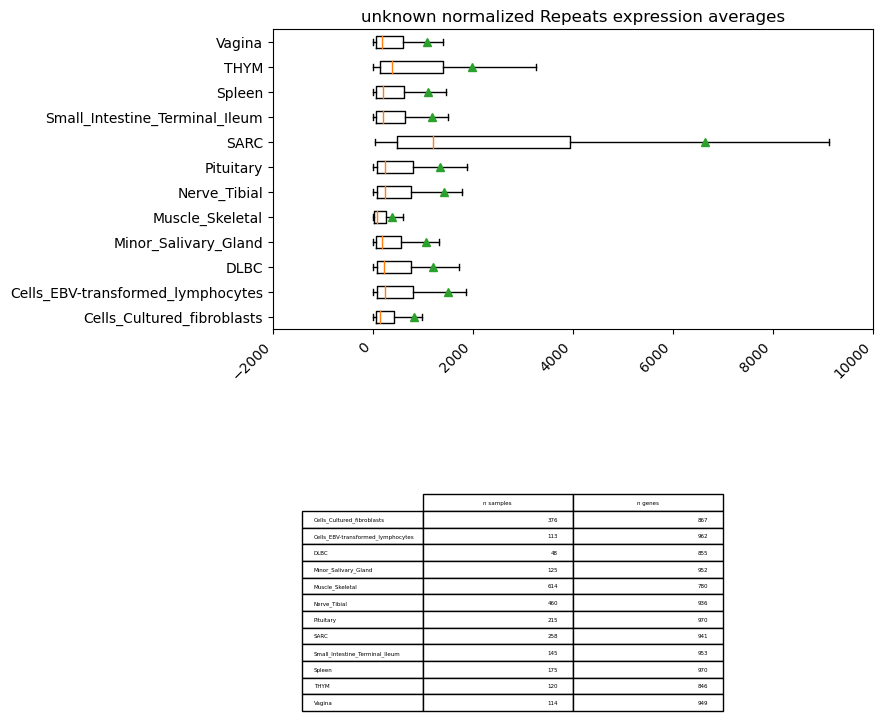

In [25]:
%%time
def plotGroupRepeats():
    titleSuffix = "normalized Repeats expression averages"
    plotGroupRepeatNormalizedAllGenesExpressedCountsOutDir = f'{imgOut}/groupedNormalizedRepeatsExpressionAverages'
    os.makedirs(plotGroupRepeatNormalizedAllGenesExpressedCountsOutDir, exist_ok=True)

    dfs = [] 
    for key, df in normalizedRepeatsAllGenesExpressedCountsDict.items():
        dfs.append( df )

    byCols = 1 # like unix paste
    localCountDF = pd.concat( dfs, axis=byCols )
    print(f'localCountDF.shape : {localCountDF.shape}')
    
    plotGroupGenesExpressedCounts(    
            categoryDict,
            localCountDF, 
            tissue2CancerDF,
            plotGroups,
            titleSuffix,
            plotGroupRepeatNormalizedAllGenesExpressedCountsOutDir, 
        )

################################################################################
plotGroupRepeats()

## normalized normalized clade gene expression averages box plot gene expression averages box plot

In [26]:
def createCladeDict(repeatDF : pd.DataFrame) -> dict[str, pd.core.indexes.base.Index] :
    '''
    creates an index of gene ids for each clade
    
    arguments:
        repeatDF: index of gene Ids, a column with name 'clade'

    returns a dictionary
        key : clade
        value is a index of gene Ids
    '''
    cladeDict = dict()
    clades = repeatDF.loc[:, "clade"].unique()
    for clade in clades : 
        # fix clade names like LTR?
        if clade[-1] == "?":
            clade = clade[0:-1] +'_question'
        selectGenes = repeatDF.loc[:, "clade"] == clade
        genes = repeatDF.index[selectGenes]
        print(f'key : {clade :<14} value : len(genes) : {len(genes)}' )
        cladeDict[clade] = genes
        
    return cladeDict

cladeDict = createCladeDict(repeatDF)

key : Simple_repeat  value : len(genes) : 14228
key : Satellite      value : len(genes) : 25
key : LINE           value : len(genes) : 183
key : DNA            value : len(genes) : 322
key : SINE           value : len(genes) : 63
key : LTR            value : len(genes) : 589
key : Low_complexity value : len(genes) : 4
key : LTR_question   value : len(genes) : 0
key : snRNA          value : len(genes) : 13
key : tRNA           value : len(genes) : 63
key : DNA_question   value : len(genes) : 0
key : Retroposon     value : len(genes) : 6
key : srpRNA         value : len(genes) : 1
key : rRNA           value : len(genes) : 3
key : Unknown        value : len(genes) : 76
key : RC             value : len(genes) : 3
key : scRNA          value : len(genes) : 5
key : RNA            value : len(genes) : 1
key : RC_question    value : len(genes) : 0
key : SINE_question  value : len(genes) : 0


## normalized TE gene expression averages box plot

******

only genes that are expressed in all samples for a given type where used
filers not shown. plot would not display because of extreme scale

!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/clade/normalized-Simple_repeat-gene-expression-averages.png
!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/clade/normalized-Satellite-gene-expression-averages.png
!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/clade/normalized-LINE-gene-expression-averages.png
!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/clade/normalized-DNA-gene-expression-averages.png
!!!!! warning LAML is not in co

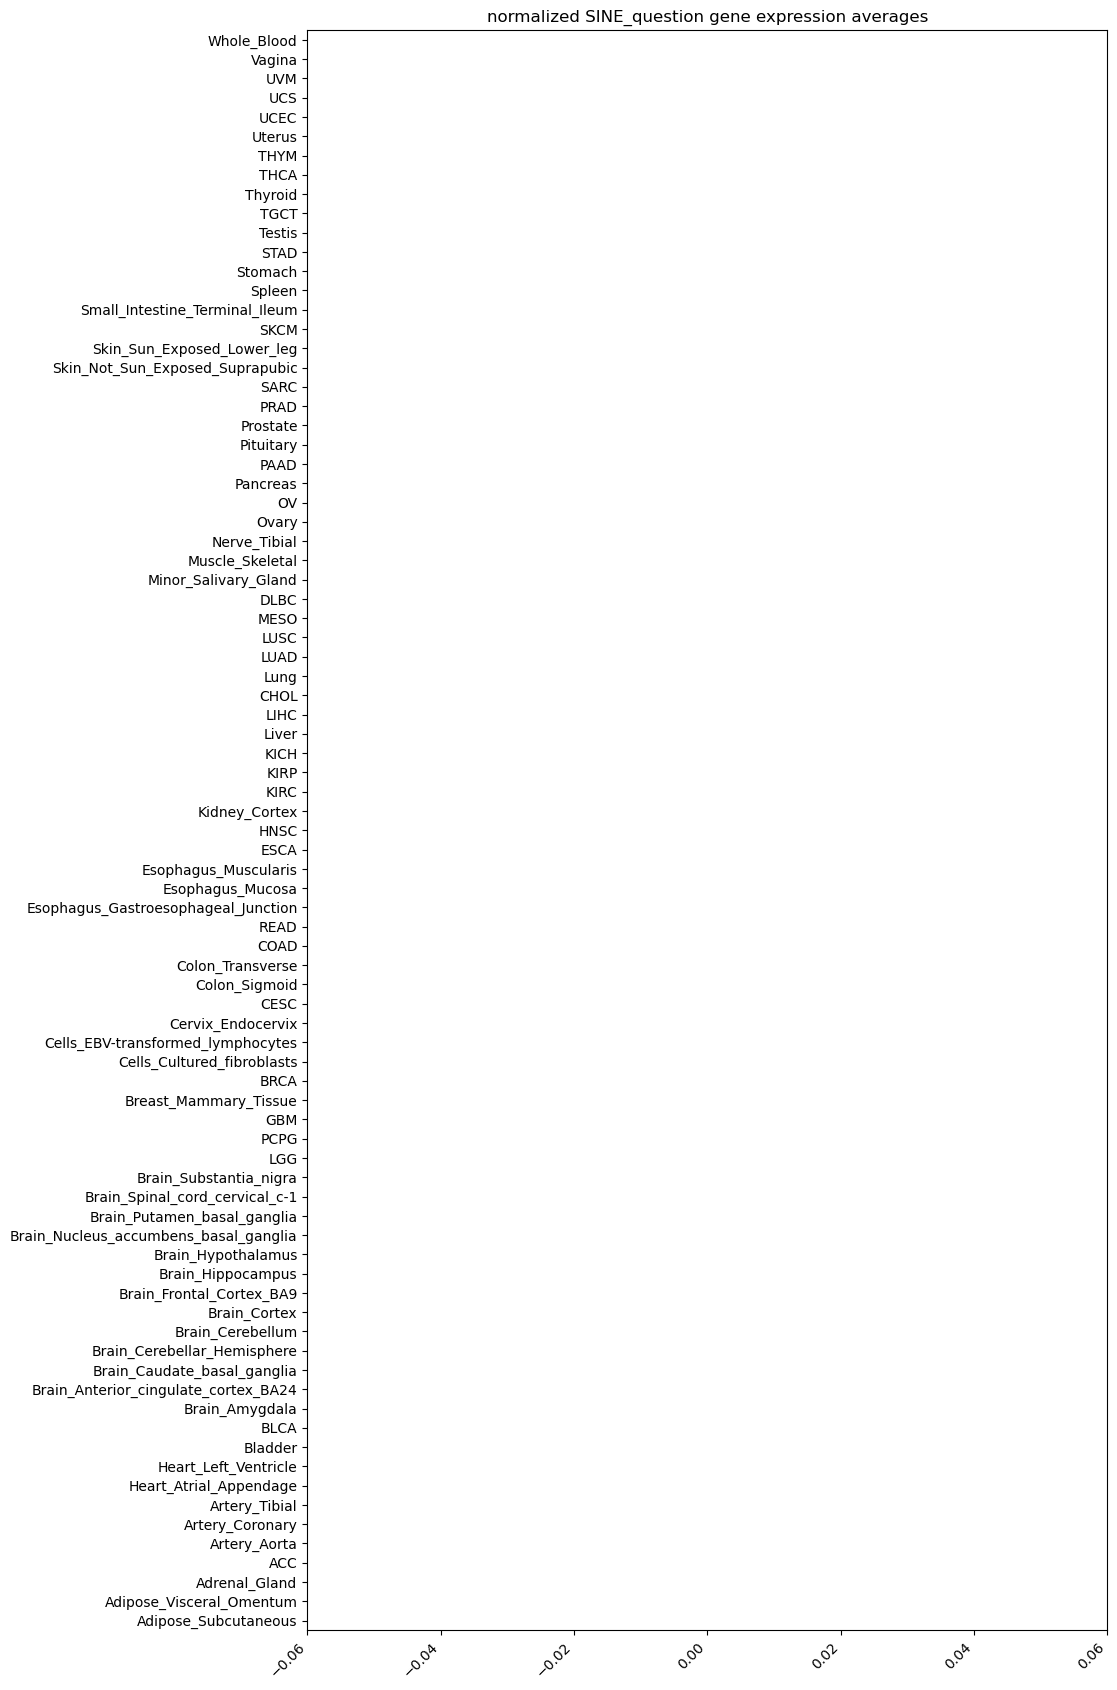

In [27]:
%%time
def plotNormalizedCladeAllGenesExpressedCountsDict(
        categoryDict,
        countsDict,
        cladeDict,
    ) :
    '''
    function wrapper to prevent global polutions

    arguments:
        categoryDict:
            keys: the colDataDF categories
            values: a list of sample ids from 

        countsDict:
            index: gene ids. example Index(['(AATGG)n', '(AC)n', '(ACACAT)n']
            keys: the colDataDF categories
            values: data frame of counts
    
        cladeDict,
            key : clade
            value is a index of gene Ids
    '''
    print(f'******\n')
    print(f'only genes that are expressed in all samples for a given type where used')
    print(f'filers not shown. plot would not display because of extreme scale\n')
        

    for clade in cladeDict.keys():
        # clade = 'Simple_repeat
        plt.close('all') # probably do not need close. with or with out it only last plot is displaed
        propertyIdx = cladeDict[clade]
        xxx = selectGenesWithProperty( categoryDict, 
                                       countsDict, 
                                        propertyIdx)   
        normalizedCladeAllGenesExpressedCountsDict = xxx

        boxPlotFig =  plt.figure( figsize=(8, 16) )
        mplu = MatPlotLibUtilities()
        boxPlotPanel = mplu.createPanelSameSizeAsFig(boxPlotFig)
        
        title=f"normalized {clade} gene expression averages" 
        boxPlotDict = categoryBoxPlots( normalizedCladeAllGenesExpressedCountsDict, 
                                        title,
                                        # w = 8,
                                        # h = 16,
                                        boxPlotPanel,
                                        verbose=False,
                                        plotOrder = list(tissue2CancerDF.index),
                                     )

        cladeDir =  f'{imgOut}/clade'
        os.makedirs(cladeDir, exist_ok=True)
        imgFilePath = f'{cladeDir}/{urlify(title)}.png'
        boxPlotFig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
        print(f'saved image to {imgFilePath}')

################################################################################
plotNormalizedCladeAllGenesExpressedCountsDict(categoryDict, 
                                               normalizedAllGenesExpressedCountsDict, 
                                               cladeDict, )


In [28]:
def findMissingTEs(TEGenesIdx, countDF):
    '''
    There are TE gene ids in repeatInfoFilePath that where not in the index
    we used when we ran completeSeq on the GTEx and TCGA data sets

    If we do not remove them pandas loc will return and error. index not found
    '''
    print(f'len(countDF.index) : {len(countDF.index)}')
    print(f'len(TEGenesIdx) : {len(TEGenesIdx)}')

    missingSet = set(TEGenesIdx) - set(countDF.index)
 
    return missingSet

In [29]:
def getTEGenesIdx(
        cladeDict :  dict[str, pd.core.indexes.base.Index],
        countDF : pd.DataFrame
        ) -> tuple[pd.core.indexes.base.Index, set]:
    '''

    returns a tuple 
        first element is an index containing TE gene ids
        second element is a set containing TE gene ids from the cladeDict that are not in the countDF.index
    '''
    
    TEClades = ['SINE', 'LINE', 'LTR']

    retIds = None
    total = 0
    for teClade in TEClades:
        #print()
        geneIdx = cladeDict[teClade]
        #print(f'{teClade} {len(geneIdx)}' )

        if retIds is not None:
            retIds = geneIdx.union(retIds)
        else:
            retIds = geneIdx
            
        total += len(geneIdx)
        #print(f'total : {total}  retIds {len(retIds)}' )

    
    missingIdxSet = set(retIds) - set(countDF.index)

    retIds = retIds.difference(missingIdxSet)

    return (retIds, missingIdxSet)

TEGenesIdx, missingTEGenesIdx = getTEGenesIdx(cladeDict, normalizedGroupbyHDF5_DF)
print(f'len(TEGenesIdx) : {len(TEGenesIdx)} TEGenesIdx[0:4] : {TEGenesIdx[0:4]}')
print(f'len(missingTEGenesIdx) : {len(missingTEGenesIdx)}')
print("\n******* missingTEGenesIdx")
print( missingTEGenesIdx )

len(TEGenesIdx) : 749 TEGenesIdx[0:4] : Index(['Alu', 'AluJb', 'AluJo', 'AluJr'], dtype='object', name='insert')
len(missingTEGenesIdx) : 85

******* missingTEGenesIdx
{'LTR13_', 'PABL_B', 'L2-3_AMi', 'LTR103_Mam', 'X15_LINE', 'CR1-L3A_Croc', 'CR1-1_Amn', 'X7D_LINE', 'Penelope1_Vert', 'LTR105_Mam', 'LTR103b_Mam', 'HERV1_LTRe', 'LTR3B_', 'L4_B_Mam', 'X21_LINE', 'ERV3-16A3_I-int', 'X12_LINE', 'L2-2_Mam', 'X24_LINE', 'LTR108c_Mam', 'LTR75_1', 'LTR102_Mam', 'HERV1_LTRa', 'MER34C_', 'AluYi6_4d', 'LTR108a_Mam', 'L4_A_Mam', 'CR1-11_Crp', 'ERV3-16A3_LTR', 'HERV-Fc1_LTR1', 'HERVE_a-int', 'LTR104_Mam', 'L2-1_Crp', 'LTR106_Mam', 'X9_LINE', 'X7A_LINE', 'X5B_LINE', 'LTR108d_Mam', 'LFSINE_Vert', 'HERV1_I-int', 'PABL_A-int', 'HERV1_LTRd', 'CR1_Mam', 'ERV24B_Prim-int', 'CR1-3_Croc', 'CR1-13_AMi', 'FLAM_A', 'L2-1_AMi', 'FLAM_C', 'MER4A1_', 'MIR1_Amn', 'HERV-Fc2_LTR', 'LTR5_Hs', 'LTR33A_', 'HERV-Fc1_LTR3', 'CR1-12_AMi', 'LTR107_Mam', 'HERV-Fc1_LTR2', 'HERV4_I-int', 'PRIMA4_LTR', 'X6A_LINE', 'CR1-8_Crp',

In [30]:
def debugHack() :
    print("############ hack debug")
    xxxDict = selectGenesWithProperty( categoryDict, 
                                   normalizedAllGenesExpressedCountsDict, 
                                   TEGenesIdx)        
    
    # normalizedRepeatsAllGenesExpressedCountsDict = xxx
    keys =  list(xxxDict.keys())
    for i in range(0,5):
        key = keys[i]
        df = xxxDict[key]
        print(f'{key} {df.shape} ')

debugHack()

############ hack debug
Adipose_Subcutaneous (661, 498) 
Artery_Tibial (623, 500) 
Heart_Atrial_Appendage (646, 347) 
Breast_Mammary_Tissue (652, 339) 
Brain_Cortex (690, 193) 


In [31]:
%%time
def plotNormalizedTEAllGenesExpressedCountsDict(
        categoryDict,
        countsDict,
        TEIdx :pd.core.indexes.base.Index,
    ) :
    '''
    function wrapper to prevent global polution

    arguments:
        categoryDict:
            keys: the colDataDF categories
            values: a list of sample ids from 

        countsDict:
            index: gene ids. example Index(['(AATGG)n', '(AC)n', '(ACACAT)n']
            keys: the colDataDF categories
            values: data frame of counts
    
       TEIdx
    '''
    print(f'******\n')
    print(f'only genes that are expressed in all samples for a given type where used')
    print(f'filers not shown. plot would not display because of extreme scale\n')
        

    plt.close('all') # probably do not need close. with or with out it only last plot is displaed
   
    xxxDict = selectGenesWithProperty( categoryDict, 
                               countsDict, 
                               TEGenesIdx)        

    normalizedRepeatsAllGenesExpressedCountsDict = xxx    

    boxPlotFig =  plt.figure( figsize=(8, 16) )
    mplu = MatPlotLibUtilities()
    boxPlotPanel = mplu.createPanelSameSizeAsFig(boxPlotFig)
    
    title=f"normalized TE gene expression averages" 
    boxPlotDict = categoryBoxPlots( normalizedRepeatsAllGenesExpressedCountsDict, 
                                    title,
                                    boxPlotPanel,
                                    # w = 8,
                                    # h = 16,
                                    verbose=False,
                                    plotOrder = list(tissue2CancerDF.index),
                                 )

    imgFilePath = f'{imgOut}/{urlify(title)}.png'
    boxPlotFig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
    print(f'saved image to {imgFilePath}')

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 26.5 µs


******

only genes that are expressed in all samples for a given type where used
filers not shown. plot would not display because of extreme scale

!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/normalized-TE-gene-expression-averages.png
CPU times: user 8.18 s, sys: 766 ms, total: 8.95 s
Wall time: 8.43 s


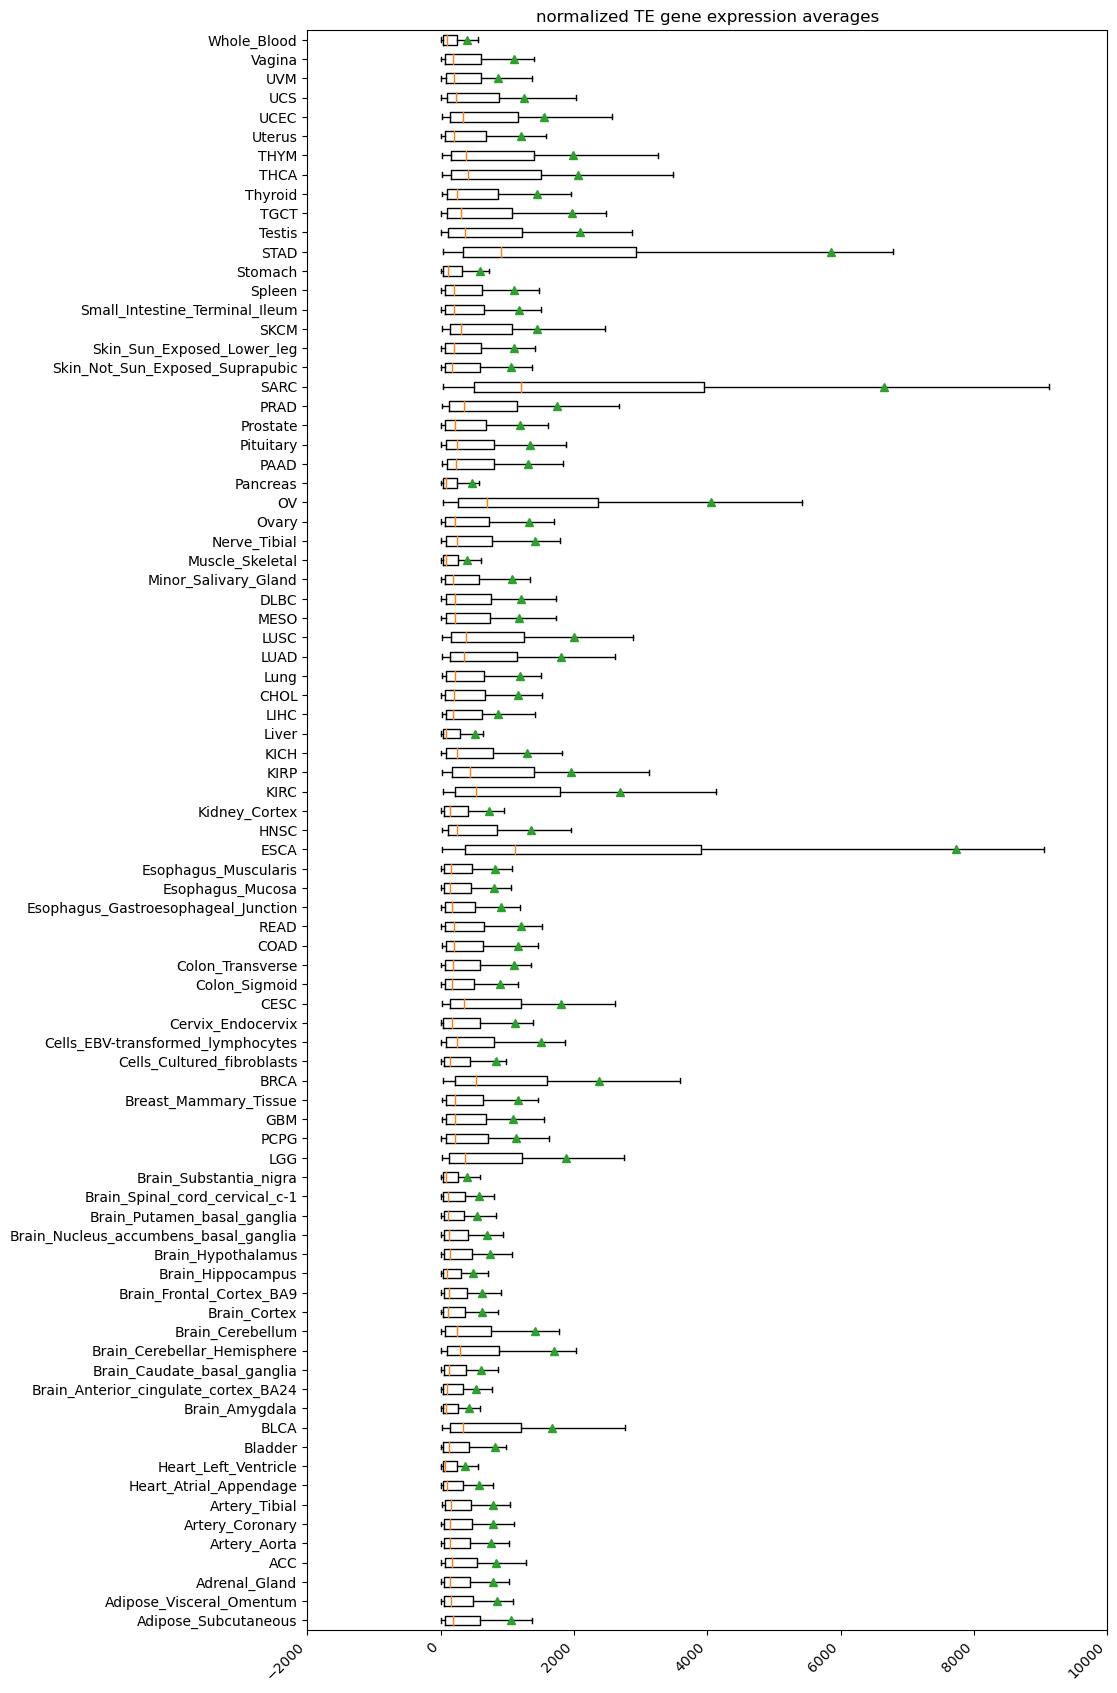

In [32]:
%%time
plotNormalizedTEAllGenesExpressedCountsDict(categoryDict, normalizedAllGenesExpressedCountsDict, TEGenesIdx)

localCountDF.shape : (727, 22432)

 plotGroup : Adipose
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedTEExpressionAverages/Adipose-normalized-TE-expression-averages.png

 plotGroup : Adrenal
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedTEExpressionAverages/Adrenal-normalized-TE-expression-averages.png

 plotGroup : Bladder
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedTEExpressionAverages/Bladder-normalized-TE-expression-averages.png

 plotGroup : Blood
!!! warning LAML is not in categoryDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedTEExpressionAverages/Blood-normalized-TE-expression-averages.png

 plotGroup : Brain
saved image to /private/home/aedavids/

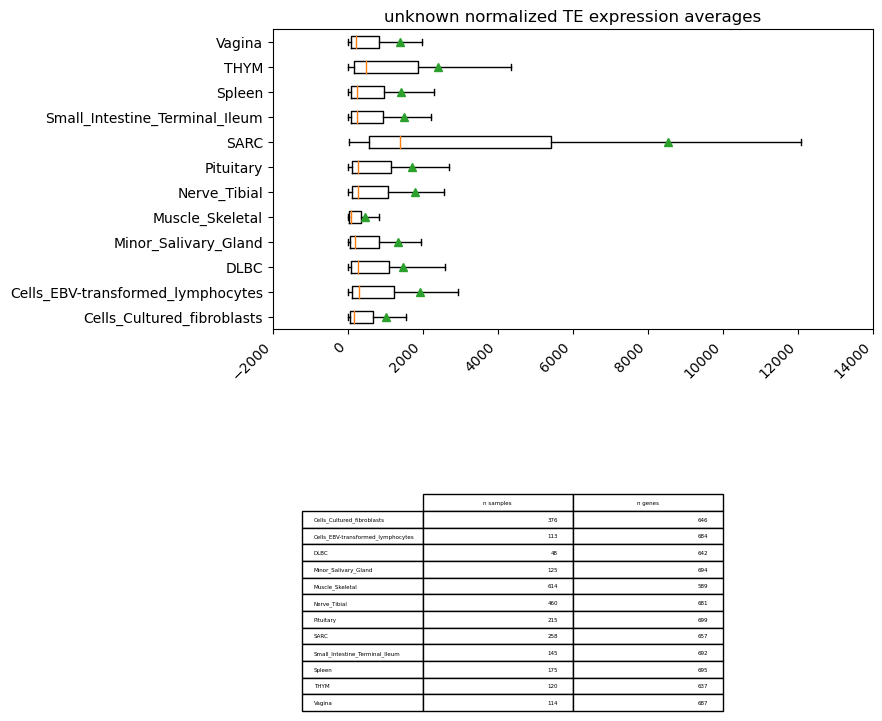

In [33]:
%%time
def plotGroupTEs(
        categoryDict,
        countsDict,
        groupsDF : pd.DataFrame,
        groupsToPlot : list[str],
        TEIdx :pd.core.indexes.base.Index,    
    ):
    '''
        arguments:
        categoryDict:
            keys: the colDataDF categories
            values: a list of sample ids from 

        countsDict:
            index: gene ids. example Index(['(AATGG)n', '(AC)n', '(ACACAT)n']
            keys: the colDataDF categories
            values: data frame of counts

       groupsDF:
            index = category. These are keys into categoryDict
            column 'plotGroup'

        groupsToPlot:
            a list of groupDF index to plot
    
       TEIdx
    '''

    titleSuffix = "normalized TE expression averages"
    plotGroupTENormalizedAllGenesExpressedCountsOutDir = f'{imgOut}/groupedNormalizedTEExpressionAverages'
    os.makedirs(plotGroupTENormalizedAllGenesExpressedCountsOutDir, exist_ok=True)


    teCountDict = selectGenesWithProperty( categoryDict, 
                               countsDict, 
                               TEGenesIdx)    

    dfs = [] 
    for key, df in  teCountDict.items():
        dfs.append( df )

    byCols = 1 # like unix paste
    localCountDF = pd.concat( dfs, axis=byCols )
    print(f'localCountDF.shape : {localCountDF.shape}')
    
    plotGroupGenesExpressedCounts(    
            categoryDict,
            localCountDF, 
            tissue2CancerDF,
            plotGroups,
            titleSuffix,
            plotGroupTENormalizedAllGenesExpressedCountsOutDir, 
        )

################################################################################
plotGroupTEs( categoryDict, 
             normalizedAllGenesExpressedCountsDict, 
             tissue2CancerDF,
             plotGroups,
             TEGenesIdx )

## normalized gencode and biotype gene expression averages box plot

In [34]:
%%time
txt2GeneFilePath =  "/private/groups/kimlab/genomes.annotations/gencode.35/gencode.v35.ucsc.rmsk.tx.to.gene.csv"
geneMapDF = mapHUGO_2_ENSG( txt2GeneFilePath )
geneMapDF.shape

CPU times: user 19.7 s, sys: 2.12 s, total: 21.9 s
Wall time: 21.8 s


(89008, 3)

In [35]:
geneMapDF.head()

,HUGO,ENSG,bioType
0,DDX11L1,ENSG00000223972.5,processed_transcript
1,DDX11L1,ENSG00000223972.5,transcribed_unprocessed_pseudogene
2,WASH7P,ENSG00000227232.5,unprocessed_pseudogene
3,MIR6859-1,ENSG00000278267.1,miRNA
4,MIR1302-2HG,ENSG00000243485.5,lncRNA


In [36]:
geneMapDF.tail()

,HUGO,ENSG,bioType
229575,MT-ND6,ENSG00000198695.2,protein_coding
229576,MT-TE,ENSG00000210194.1,Mt_tRNA
229577,MT-CYB,ENSG00000198727.2,protein_coding
229578,MT-TT,ENSG00000210195.2,Mt_tRNA
229579,MT-TP,ENSG00000210196.2,Mt_tRNA


In [37]:
%%time
gencodeIdx = geneMapDF.loc[:, "HUGO"]
xxx = selectGenesWithProperty( categoryDict, 
                               normalizedAllGenesExpressedCountsDict, 
                               gencodeIdx)        

normalizedGencodeAllGenesExpressedCountsDict = xxx
print(gencodeIdx.shape)
display(gencodeIdx.head())

# sanity check. Lung should only express  a subset all genecode genes
print(f'\ngencode lung.shape {normalizedGencodeAllGenesExpressedCountsDict["Lung"].shape}') 

(89008,)


0        DDX11L1
1        DDX11L1
2         WASH7P
3      MIR6859-1
4    MIR1302-2HG
Name: HUGO, dtype: object


gencode lung.shape (16937, 440)
CPU times: user 12 s, sys: 1.88 s, total: 13.8 s
Wall time: 13.8 s


******

only genes that are expressed in all samples for a given type where used
filers not shown. plot would not display because of extreme scale

!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/normalized-gencode-gene-expression-averages.png


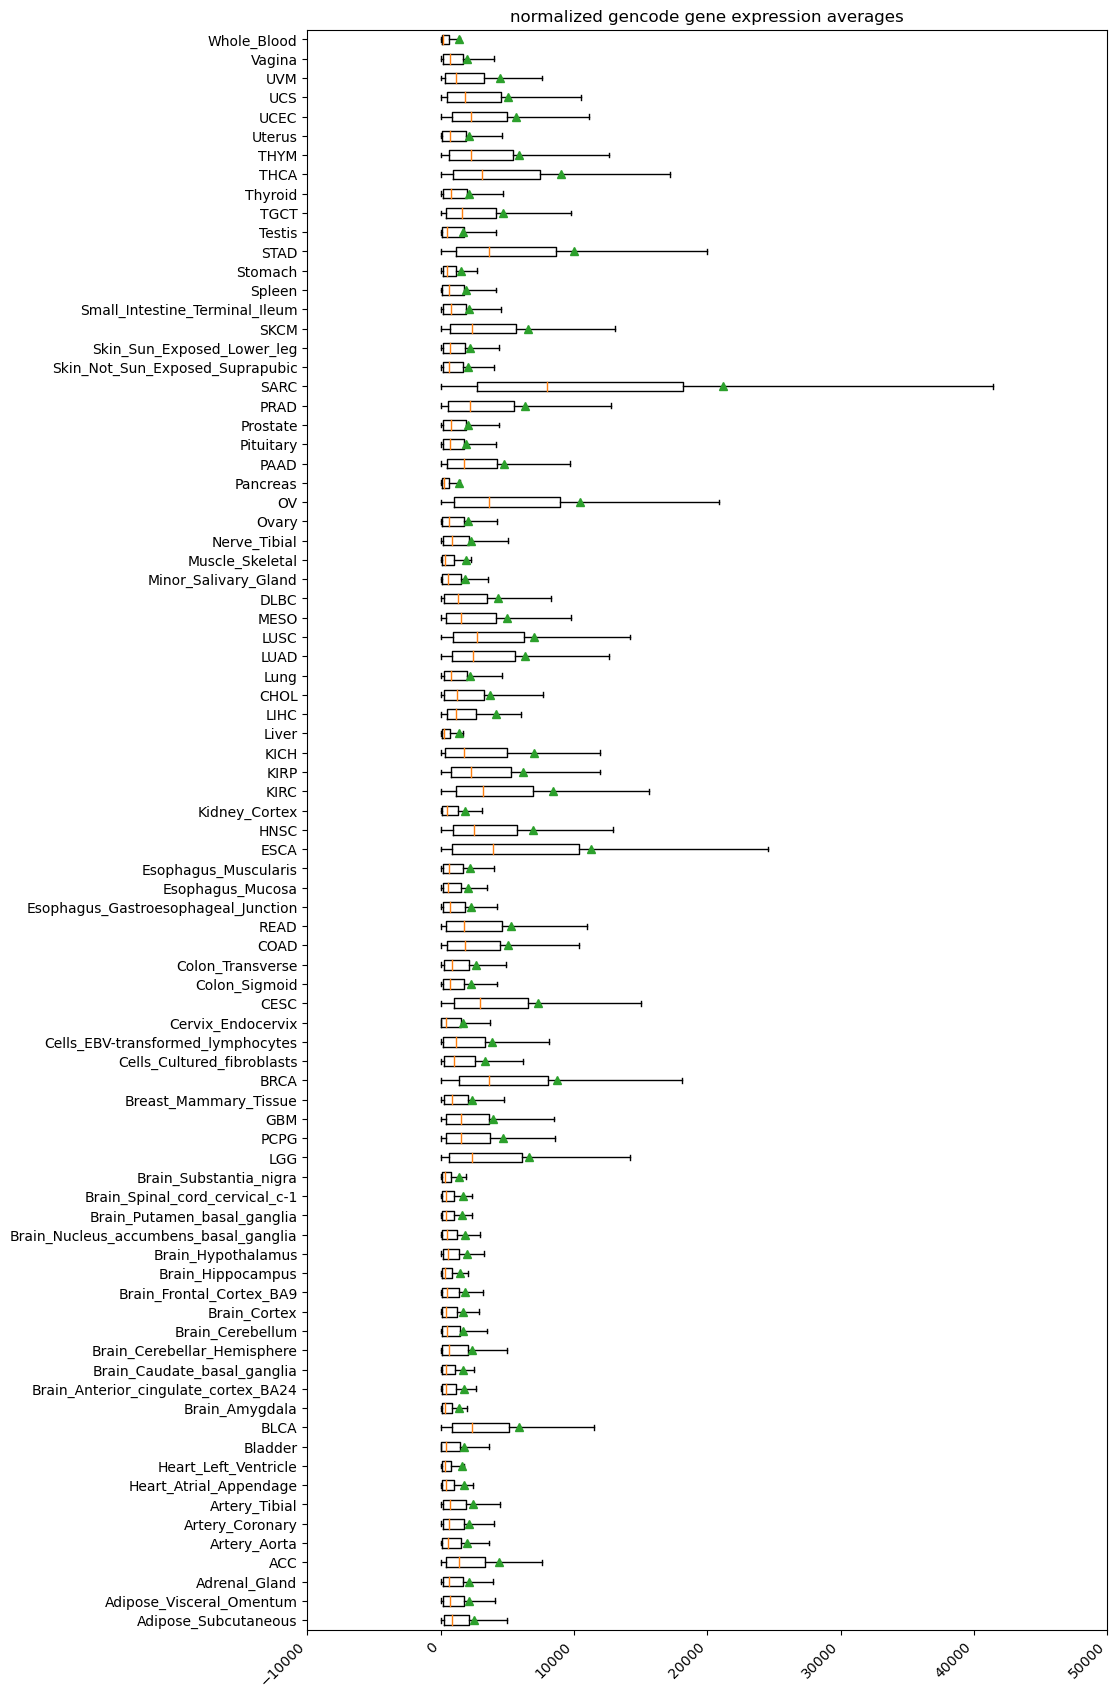

In [38]:
def plotNormalizedGenCodeAllGenesExpressedCountsDict(normalizedGencodeAllGenesExpressedCountsDict) :
    '''
    function wrapper to prevent global polutions
    '''
    print(f'******\n')
    print(f'only genes that are expressed in all samples for a given type where used')
    print(f'filers not shown. plot would not display because of extreme scale\n')

    pageWidthInInches = 8
    pageHeightInInches = 16
    fig =  plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
    mplu = MatPlotLibUtilities()
    boxPlotPanel = mplu.createPanelSameSizeAsFig(fig)

    title="normalized gencode gene expression averages" 
    plotOrder = list(tissue2CancerDF.index)
    boxPlotDict = categoryBoxPlots(
                                  normalizedGencodeAllGenesExpressedCountsDict, 
                                  title,
                                  boxPlotPanel,
                                  plotOrder = list(tissue2CancerDF.index),
                                  # verbose=False,                                               
                                )
    
    imgFilePath = f'{imgOut}/{urlify(title)}.png'
    fig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
    print(f'saved image to {imgFilePath}')

################################################################################
plotNormalizedGenCodeAllGenesExpressedCountsDict(normalizedGencodeAllGenesExpressedCountsDict)

localCountDF.shape : (30293, 22432)

 plotGroup : Adipose
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGencodeExpressionAverages/Adipose-normalized-Repeats-expression-averages.png

 plotGroup : Adrenal
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGencodeExpressionAverages/Adrenal-normalized-Repeats-expression-averages.png

 plotGroup : Bladder
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGencodeExpressionAverages/Bladder-normalized-Repeats-expression-averages.png

 plotGroup : Blood
!!! warning LAML is not in categoryDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/groupedNormalizedGencodeExpressionAverages/Blood-normalized-Repeats-expression-averages.png

 plotGroup : Br

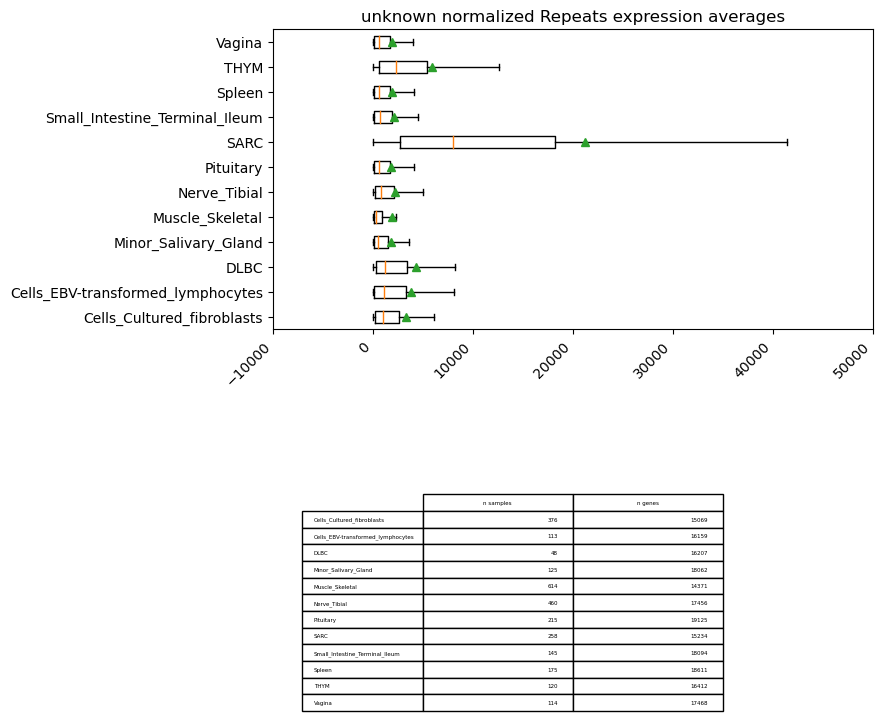

In [39]:
%%time
def plotGroupGencode(normalizedGencodeAllGenesExpressedCountsDict):
    titleSuffix = "normalized Repeats expression averages"
    plotGroupGencodeNormalizedAllGenesExpressedCountsOutDir = f'{imgOut}/groupedNormalizedGencodeExpressionAverages'
    os.makedirs(plotGroupGencodeNormalizedAllGenesExpressedCountsOutDir, exist_ok=True)

    dfs = [] 
    for key, df in normalizedGencodeAllGenesExpressedCountsDict.items():
        dfs.append( df )

    byCols = 1 # like unix paste
    localCountDF = pd.concat( dfs, axis=byCols )
    print(f'localCountDF.shape : {localCountDF.shape}')
    
    plotGroupGenesExpressedCounts(    
            categoryDict,
            localCountDF, 
            tissue2CancerDF,
            plotGroups,
            titleSuffix,
            plotGroupGencodeNormalizedAllGenesExpressedCountsOutDir, 
        )

################################################################################
plotGroupGencode(normalizedGencodeAllGenesExpressedCountsDict)

In [40]:
bioTypes = geneMapDF.loc[:, 'bioType'].unique()
bioTypes

array(['processed_transcript', 'transcribed_unprocessed_pseudogene',
       'unprocessed_pseudogene', 'miRNA', 'lncRNA', 'protein_coding',
       'processed_pseudogene', 'snRNA',
       'transcribed_processed_pseudogene', 'retained_intron',
       'nonsense_mediated_decay', 'misc_RNA', 'TEC', 'pseudogene',
       'transcribed_unitary_pseudogene', 'non_stop_decay', 'snoRNA',
       'scaRNA', 'rRNA_pseudogene', 'unitary_pseudogene',
       'polymorphic_pseudogene', 'rRNA', 'IG_V_pseudogene', 'scRNA',
       'IG_V_gene', 'IG_C_gene', 'IG_J_gene', 'sRNA', 'ribozyme',
       'translated_processed_pseudogene', 'vault_RNA', 'TR_C_gene',
       'TR_J_gene', 'TR_V_gene', 'TR_V_pseudogene',
       'translated_unprocessed_pseudogene', 'TR_D_gene',
       'IG_C_pseudogene', 'TR_J_pseudogene', 'IG_J_pseudogene',
       'IG_D_gene', 'IG_pseudogene', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

In [41]:
%%time
def createBiotypeDict(df : pd.DataFrame) -> dict[str, pd.core.indexes.base.Index] :
    '''
    creates an index of gene ids for each biotype
    
    arguments:
        df: index of gene Ids, a column with name 'bioType'

    returns a dictionary
        key : biotype
        value is a index of gene Ids
    '''
    bioTypeDict = dict()
    bioTypes = df.loc[:, "bioType"].unique()
    for bioType in bioTypes : 
        # # fix clade names like LTR?
        # if clade[-1] == "?":
        #     clade = clade[0:-1] +'_question'
        selectGenes = df.loc[:, "bioType"] == bioType
        genes = df.index[selectGenes]
        print(f'key : {bioType :<14} value : len(genes) : {len(genes)}' )
        bioTypeDict[bioType] = genes
        
    return bioTypeDict

################################################################################
bioTypeDict = createBiotypeDict( geneMapDF.set_index('HUGO'))

# sanity check
print(f'\nlen(bioTypeDict.keys() : {len(bioTypeDict.keys())}')
print(f'len(bioTypeDict["protein_coding"]) {len(bioTypeDict["protein_coding"])}')
bioTypeDict["protein_coding"][0:5]

key : processed_transcript value : len(genes) : 11332
key : transcribed_unprocessed_pseudogene value : len(genes) : 948
key : unprocessed_pseudogene value : len(genes) : 2615
key : miRNA          value : len(genes) : 1881
key : lncRNA         value : len(genes) : 16868
key : protein_coding value : len(genes) : 19690
key : processed_pseudogene value : len(genes) : 10169
key : snRNA          value : len(genes) : 1901
key : transcribed_processed_pseudogene value : len(genes) : 500
key : retained_intron value : len(genes) : 9802
key : nonsense_mediated_decay value : len(genes) : 7329
key : misc_RNA       value : len(genes) : 2212
key : TEC            value : len(genes) : 1129
key : pseudogene     value : len(genes) : 37
key : transcribed_unitary_pseudogene value : len(genes) : 145
key : non_stop_decay value : len(genes) : 80
key : snoRNA         value : len(genes) : 943
key : scaRNA         value : len(genes) : 49
key : rRNA_pseudogene value : len(genes) : 497
key : unitary_pseudogene valu

Index(['OR4F5', 'OR4F29', 'OR4F16', 'SAMD11', 'NOC2L'], dtype='object', name='HUGO')

******

only genes that are expressed in all samples for a given type where used
filers not shown. plot would not display because of extreme scale

!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/bioType/normalized-processed_transcript-gene-expression-averages.png
!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/bioType/normalized-transcribed_unprocessed_pseudogene-gene-expression-averages.png
!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/bioType/normalized-unprocessed_pseudogene-gene-expression-averages.png
!!!!! warning LAML is not in countDict
saved image to /private/home/aedavids/extraCellularRNA/terra/GTExTCGA_Release/jupyterNotebooks/boxPlots.out/img/bioType/normalized-miRNA-

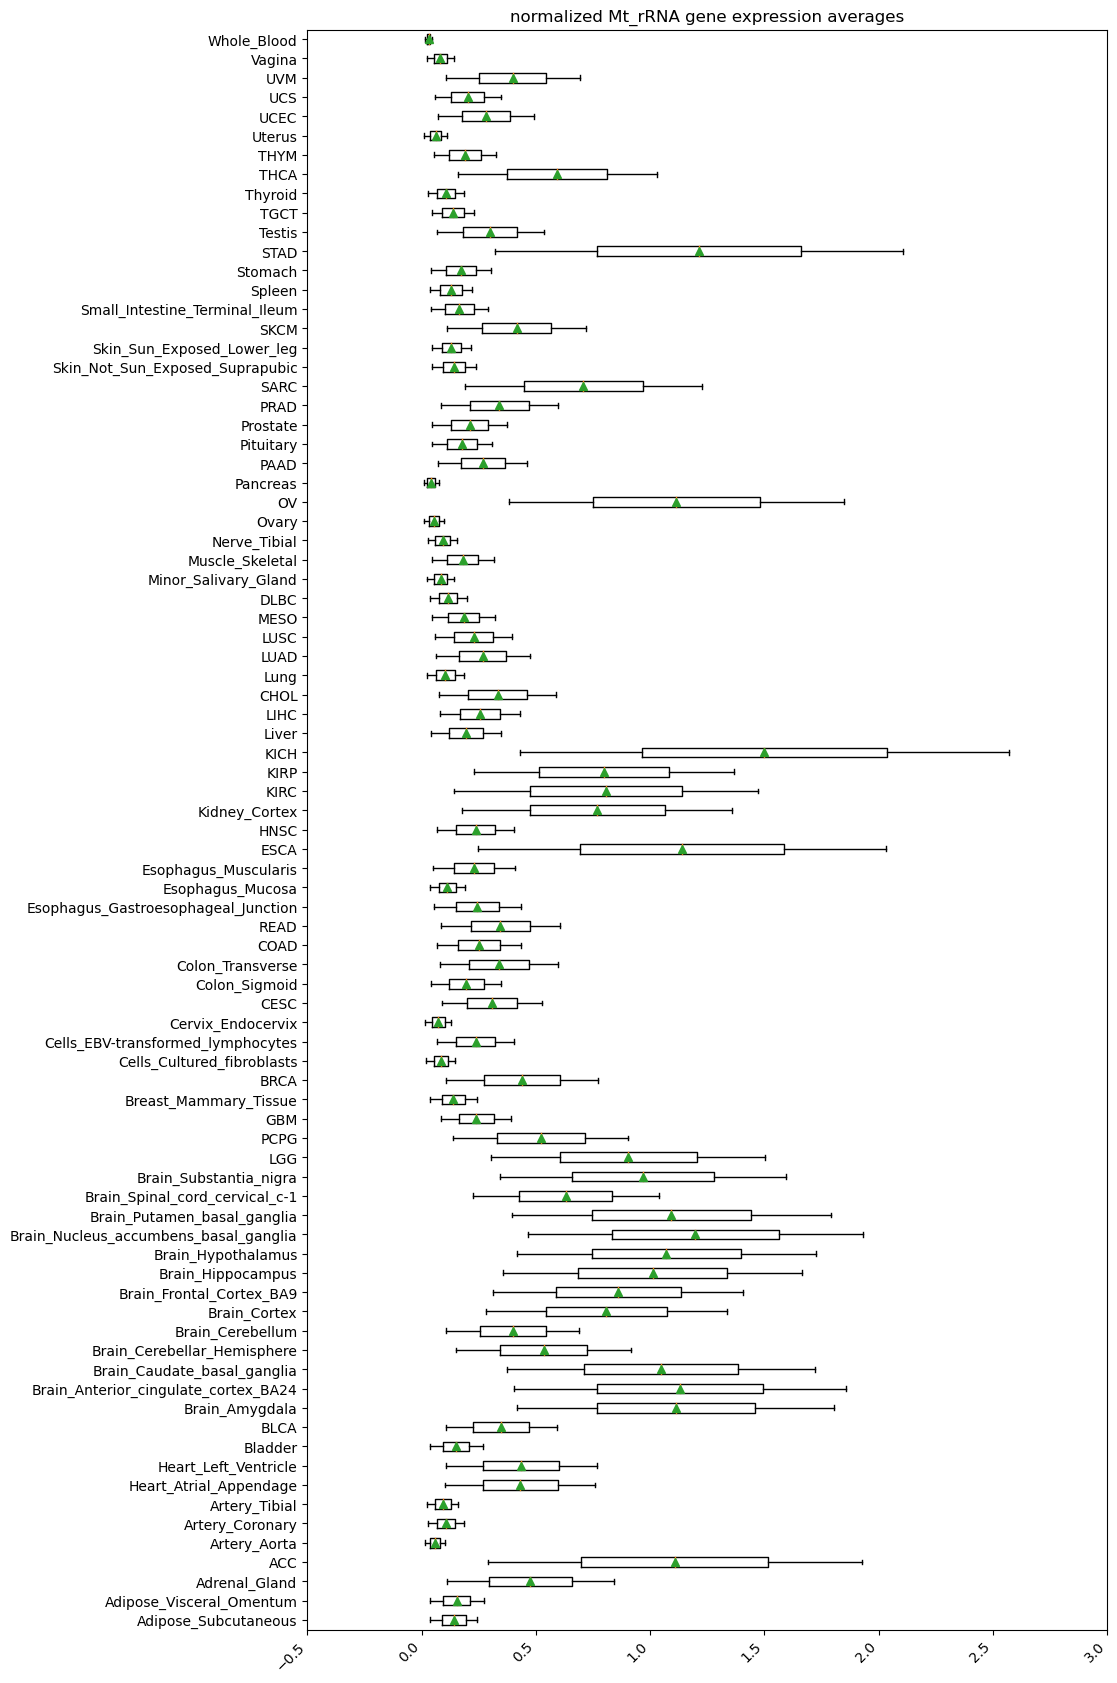

In [42]:
%%time
def plotNormalizedBioTypesAllGenesExpressedCountsDict(
        categoryDict,
        countsDict,
        bioTypeDict,
    ) :
    '''
    function wrapper to prevent global polutions

    arguments:
        categoryDict:
            keys: the colDataDF categories
            values: a list of sample ids from 

        countsDict:
            index: gene ids. example Index(['(AATGG)n', '(AC)n', '(ACACAT)n']
            keys: the colDataDF categories
            values: data frame of counts
    
        biotypeDict,
            key : clade
            value is a index of gene Ids
    '''
    print(f'******\n')
    print(f'only genes that are expressed in all samples for a given type where used')
    print(f'filers not shown. plot would not display because of extreme scale\n')        

    for bioType in bioTypeDict.keys():
        # bioType = 'protein_coding'
        plt.close('all') # probably do not need close. with or with out it only last plot is displaed
        propertyIdx = bioTypeDict[bioType]
        xxx = selectGenesWithProperty( categoryDict, 
                                       countsDict, 
                                        propertyIdx)   
        normalizedCladeAllGenesExpressedCountsDict = xxx

        boxPlotFig =  plt.figure( figsize=(8, 16) )
        mplu = MatPlotLibUtilities()
        boxPlotPanel = mplu.createPanelSameSizeAsFig(boxPlotFig)
        
        title=f"normalized {bioType} gene expression averages" 
        boxPlotDict = categoryBoxPlots( normalizedCladeAllGenesExpressedCountsDict, 
                                        title,
                                        # w = 8,
                                        # h = 16,
                                        boxPlotPanel,
                                        verbose=False,
                                        plotOrder = list(tissue2CancerDF.index),
                                     )

        bioTypeDir =  f'{imgOut}/bioType'
        os.makedirs(bioTypeDir, exist_ok=True)
        imgFilePath = f'{bioTypeDir}/{urlify(title)}.png'
        boxPlotFig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
        print(f'saved image to {imgFilePath}')

################################################################################
plotNormalizedBioTypesAllGenesExpressedCountsDict(categoryDict, 
                                               normalizedGencodeAllGenesExpressedCountsDict, 
                                               bioTypeDict, )


# <span style="color:red;background-color:yellow">save</span>

In [43]:
%%time
def klHist(categoryCountsDict,
        w : int = 4,
        h :  int = 4,        
        nCols : int=3,
        bins : int = 10,
        fs : int = 6,
       ) :
    '''
    TODO
    '''
    print("AEDWIP why is hte first bin's right side edge only 11? ie not the same interval as all the other?")
    print("AEDWIP ? plot histogram for botom 0.25 quartile?")
    print("aEDWIP can we splice the box plot x axis? ie drop the streches that are all zero")
    print()
          
    plt.close('all')
    categories = list(categoryCountsDict.keys())[0:4]

    # calculate the number of rows
    numCategories = len(categories)
    nRows = numCategories // nCols # modular division // returns quotien 

    # modular division % returns remainder
    # print(f' {numCategories} {nRows} {nCols}')
    if (numCategories % nCols) != 0:
        # add a row
        nRows += 1

    print(f'subplots  {numCategories} {nRows} {nCols}')
    fig, axsNP = plt.subplots(nrows=nRows, ncols=nCols, figsize=(w, h), ) #sharey=True
    #numPlotRows = axsNP.shape[0]
    for i in range(len(categories)) :
        rowIdx, colIdx = (i//nCols, i%nCols) # modular division // returns quotien % returns remainder
        category = categories[i]
        # :<25 left align text
        print(f'\n{category : <25} i:{i} row:{rowIdx} col:{colIdx}')
        panel = axsNP[rowIdx][colIdx]

        # x = categoryCountsDict[category].loc[:, 'geneMeans']
        x = categoryCountsDict[category].loc[:, 'geneMeans'].sample(frac=1.0)
        n, hBins, patches = panel.hist( x, bins=bins)
        print(f'n.shape : {n.shape} hBins.shape : {hBins.shape}' )
        for xxx in range(n.shape[0]):
            print(f'bin : {xxx}  right boundary : {hBins[xxx]} count : {n[xxx]}')   
        return

        panel.set_title( category, fontsize=fs)

    # remove empty panels
    numAxes = nRows * nCols
    i += 1
    while i < numAxes :
        rowIdx, colIdx = (i//nCols, i%nCols) # modular division // returns quotien % returns remainder
        fig.delaxes(axsNP[rowIdx][colIdx])
        i += 1
    
    plt.tight_layout()
        

# klHist(normalizedAllGenesExpressedCountsDict, w=16, h=8, bins=500)

CPU times: user 13 µs, sys: 2 µs, total: 15 µs
Wall time: 26 µs
